In [2]:
import scSherlock as sh
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')

In [18]:
# load scpoli
adata_pred = sc.read_h5ad('/home/croizer/Desktop/caibi/adata_no_prototypes_working.h5ad')

In [19]:
adata_pred = adata_pred[adata_pred.obs['query'].isin(['1'])]

In [37]:
adata2 = sc.read_h5ad('/home/croizer/Documents/02_Analysis/02_scSherlock/Analysis/pbmcSCA.h5ad')

In [45]:
adata_pred.obs['cell_type_pred']

AAGCGGCAACAAATTTGC_1-1         CD16 Mono
CTCGCAGCCCTCTAAGGG_1-1         CD16 Mono
CAACAATTTAGGCCATCT_1-1               pDC
CTCGCATTCATAAGTTTA_1-1         CD16 Mono
TCTACCGGGCGAATTTGC_1-1         CD16 Mono
                               ...      
S2521_X24088_5.176_34-1        CD8 TEM_3
S2521_X24088_6.177_34-1    NK_CD56bright
S2521_X24088_5.132_34-1    NK_CD56bright
S2521_X24088_5.183_34-1    NK_CD56bright
S2521_X24088_5.182_34-1    NK_CD56bright
Name: cell_type_pred, Length: 246310, dtype: category
Categories (58, object): ['ASDC_mDC', 'ASDC_pDC', 'B intermediate kappa', 'B intermediate lambda', ..., 'gdT_2', 'gdT_3', 'gdT_4', 'pDC']

In [46]:
adata2.obs['cell_type'] = adata_pred.obs['cell_type_pred'].values

In [38]:
adata2.obs['cell_type'] = adata_pred.obs['cell_type_pred']
cell_type_column = "cell_type"
patient_column = "orig.ident"

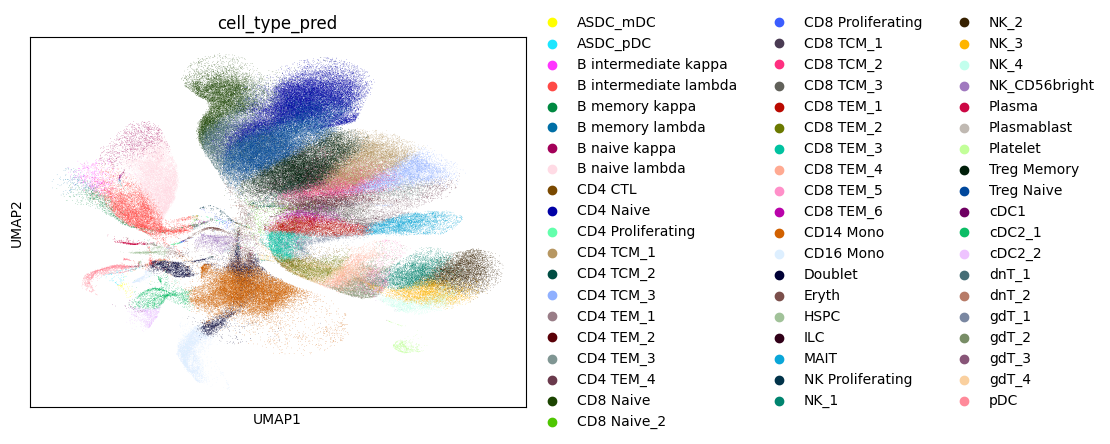

In [14]:
sc.pl.umap(adata, color=['cell_type_pred'])

In [32]:
# Load the data
adata = sc.read_h5ad("/home/croizer/Documents/02_Analysis/02_scSherlock/hao_2021_SCT.h5ad")
cell_type_column = "celltype.l3"
patient_column = "donor"


In [33]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=5,
    n_jobs=-1
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_patient=patient_column,
    config=config
)

2025-04-04 17:15:19,578 - ScSherlock - INFO - ScSherlock initialized with (161764, 20729) data matrix


In [34]:
top_markers = scherlock.run(column_ctype=cell_type_column, method='empiric')


2025-04-04 17:15:20,206 - ScSherlock - INFO - Calculating theoretical scores for celltype.l3...
Aggregating Samples: 100%|██████████| 464/464 [00:00<00:00, 555.39it/s]
2025-04-04 17:15:48,494 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-04 17:15:48,495 - ScSherlock - INFO - Applying multi-category correction...
2025-04-04 17:15:48,606 - ScSherlock - INFO - Aggregating scores...
2025-04-04 17:15:48,708 - ScSherlock - INFO - Sorting scores...
2025-04-04 17:15:48,886 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 464/464 [00:00<00:00, 543.77it/s]


0      celltype.l3::ASDC_mDC--donor_simplified::P1
1      celltype.l3::ASDC_mDC--donor_simplified::P2
2      celltype.l3::ASDC_mDC--donor_simplified::P3
3      celltype.l3::ASDC_mDC--donor_simplified::P4
4      celltype.l3::ASDC_mDC--donor_simplified::P5
                          ...                     
457         celltype.l3::pDC--donor_simplified::P4
458         celltype.l3::pDC--donor_simplified::P5
459         celltype.l3::pDC--donor_simplified::P6
460         celltype.l3::pDC--donor_simplified::P7
461         celltype.l3::pDC--donor_simplified::P8
Name: SampleName, Length: 462, dtype: object


Aggregating Samples: 100%|██████████| 58/58 [00:02<00:00, 27.61it/s]


Cell types in sorted_table: dict_keys(['CD14 Mono', 'CD4 TCM_1', 'CD8 Naive', 'NK_2', 'CD8 TEM_1', 'CD16 Mono', 'B intermediate lambda', 'CD4 Naive', 'CD4 CTL', 'B naive kappa', 'CD4 TCM_3', 'MAIT', 'CD4 TCM_2', 'CD8 TEM_2', 'gdT_3', 'NK_1', 'CD8 TCM_1', 'dnT_2', 'B intermediate kappa', 'B memory kappa', 'Doublet', 'pDC', 'CD8 TEM_5', 'gdT_1', 'B naive lambda', 'NK_4', 'CD8 Proliferating', 'CD8 TCM_2', 'Treg Naive', 'Plasma', 'CD4 TEM_1', 'Treg Memory', 'CD4 TEM_3', 'CD8 TCM_3', 'cDC2_1', 'NK Proliferating', 'CD8 TEM_4', 'ASDC_pDC', 'CD4 TEM_2', 'B memory lambda', 'dnT_1', 'HSPC', 'cDC2_2', 'Platelet', 'NK_CD56bright', 'CD4 TEM_4', 'CD8 TEM_6', 'CD8 Naive_2', 'gdT_2', 'NK_3', 'CD8 TEM_3', 'CD4 Proliferating', 'Eryth', 'gdT_4', 'Plasmablast', 'cDC1', 'ASDC_mDC', 'ILC'])
Cell types in ctype_n_patients: ['ASDC_mDC', 'ASDC_pDC', 'B intermediate kappa', 'B intermediate lambda', 'B memory kappa', 'B memory lambda', 'B naive kappa', 'B naive lambda', 'CD14 Mono', 'CD16 Mono', 'CD4 CTL', 'CD4 

2025-04-04 17:15:52,463 - ScSherlock - INFO - Calculating empirical scores...
2025-04-04 17:17:10,549 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-04 17:17:10,562 - ScSherlock - INFO - Sorting empirical scores...
2025-04-04 17:17:10,601 - ScSherlock - INFO - Identifying top markers...
2025-04-04 17:17:10,603 - ScSherlock - INFO - ScSherlock completed. Found markers for 36/58 cell types


In [15]:
#scherlock.recompute_empirical('CD14 Mono', min_proportion=0.00001)

In [35]:
results = scherlock.get_results(column_ctype=cell_type_column)
results = results['sorted_emp_table']

In [36]:
def extract_genes_by_cell_type(results_dict, 
                               min_genes=0,
                               sort_by_column=None,
                               top_n=None,
                               filter_by_value=None):
    """
    Extract gene lists by cell type from a results dictionary.
    
    Parameters:
    -----------
    results_dict : dict
        Dictionary with cell types as keys and DataFrames as values
    min_genes : int, default=0
        Minimum number of genes required to include a cell type
    sort_by_column : str, optional
        Column name to sort genes by (e.g., 'aggregated', '1', '10', '25', 'exp_prop')
    top_n : int, optional
        Return only the top N genes per cell type (after sorting)
    filter_by_value : dict, optional
        Filter genes by column value, e.g., {'aggregated': 0.5} keeps genes with aggregated > 0.5
    
    Returns:
    --------
    dict
        Dictionary with cell types as keys and lists of gene names as values
    """
    gene_lists = {}
    
    for cell_type, df in results_dict.items():
        # Skip empty DataFrames
        if hasattr(df, 'empty') and df.empty:
            gene_lists[cell_type] = []
            continue
            
        # If the DataFrame has content, process it
        if hasattr(df, 'index'):
            # Apply filter if provided
            filtered_df = df
            if filter_by_value:
                for col, threshold in filter_by_value.items():
                    if col in filtered_df.columns:
                        filtered_df = filtered_df[filtered_df[col] > threshold]
            
            # Sort if requested
            if sort_by_column and sort_by_column in filtered_df.columns:
                filtered_df = filtered_df.sort_values(by=sort_by_column, ascending=False)
            
            # Limit to top N if requested
            if top_n is not None and top_n > 0:
                filtered_df = filtered_df.head(top_n)
            
            # Extract gene names (they're in the index)
            genes = filtered_df.index.tolist()
            gene_lists[cell_type] = genes
    
    # Filter out cell types with fewer than min_genes
    result = {cell_type: genes for cell_type, genes in gene_lists.items() 
              if len(genes) >= min_genes}
    
    return result



gene_lists = extract_genes_by_cell_type(results)
gene_lists

{'CD14 Mono': ['LINC02218',
  'PPARGC1A',
  'HP',
  'IGSF23',
  'AC009974.1',
  'AC110048.2',
  'SERPINB2',
  'ST6GALNAC2',
  'AC004775.1',
  'TRPV4',
  'CCL2',
  'AC084871.2',
  'ASTL',
  'HTRA1',
  'AC022001.3',
  'LINC01474',
  'AL031123.1',
  'AC003991.1',
  'NECAB2',
  'DEFB1',
  'AC234772.3',
  'ORM1',
  'SULT1A4',
  'KCNJ15',
  'AL158801.2',
  'LINC00656',
  'RNU6ATAC35P',
  'COLEC12',
  'AC025580.2',
  'XKR4',
  'PDYN-AS1',
  'LINC01736',
  'IL31RA',
  'AL512343.2',
  'AC037198.2',
  'AC012150.2',
  'ADGRV1',
  'AL078644.2',
  'ACSS3',
  'CSMD1',
  'AC067930.1',
  'ELANE',
  'AC025580.1',
  'AC008753.2',
  'CEACAM19',
  'CCIN',
  'KRT23',
  'AC026691.1',
  'SLC26A8',
  'AL162591.2',
  'HOMER3-AS1',
  'AL032821.1',
  'ADGRB1',
  'AL132821.1',
  'AP000640.1',
  'AC061992.1',
  'LINC01962',
  'AL031123.2',
  'PRRG1',
  'CLDN9',
  'NOS1AP',
  'TREM2',
  'TDRD6',
  'AC027607.1',
  'MYO7A',
  'PTTG2',
  'AC131009.2',
  'AC015802.4',
  'AC100847.1',
  'AC006017.1',
  'AC007228.2',
  '

## Basic plotting 

In [ ]:
adata2 = sc.read_h5ad('/home/croizer/Desktop/caibi/pbmc_LT.h5ad')

In [49]:
def check_markers_in_adata(adata, markers):
    """
    Check which markers are present in the features of an AnnData object.
    
    Parameters:
    -----------
    adata : AnnData
        The AnnData object containing single-cell data
    markers : list
        List of marker gene names to check
    
    Returns:
    --------
    dict
        Dictionary with 'found' and 'not_found' lists of markers
    """
    # Get all feature names from adata
    all_features = set(adata.var_names)
    
    # Check which markers are in the features
    found_markers = []
    not_found_markers = []
    
    for marker in markers:
        if marker in all_features:
            found_markers.append(marker)
        else:
            not_found_markers.append(marker)
    
    # Print summary
    print(f"Found {len(found_markers)} out of {len(markers)} markers")
    print(f"Missing: {len(not_found_markers)} markers")
    
    return found_markers


common_genes = check_markers_in_adata(adata2, gene_lists['CD14 Mono'])
# print("\nFound markers:")
# print(result["found"])
# print("\nNot found markers:")
# print(result["not_found"])
common_genes

Found 45 out of 100 markers
Missing: 55 markers


['PPARGC1A',
 'HP',
 'IGSF23',
 'SERPINB2',
 'ST6GALNAC2',
 'TRPV4',
 'CCL2',
 'ASTL',
 'HTRA1',
 'NECAB2',
 'DEFB1',
 'ORM1',
 'SULT1A4',
 'KCNJ15',
 'COLEC12',
 'XKR4',
 'IL31RA',
 'ADGRV1',
 'ACSS3',
 'CSMD1',
 'ELANE',
 'CEACAM19',
 'CCIN',
 'KRT23',
 'SLC26A8',
 'ADGRB1',
 'PRRG1',
 'CLDN9',
 'NOS1AP',
 'TREM2',
 'TDRD6',
 'MYO7A',
 'PTTG2',
 'DNER',
 'AC011498.4',
 'CFAP58',
 'INHBA',
 'RGMA',
 'TMEM105',
 'CRX',
 'MAPK8IP2',
 'SNORC',
 'GPR42',
 'RTEL1-TNFRSF6B',
 'PLCD3']

In [51]:
adata2.obs['cell_type'].value_counts()

cell_type
Treg Naive               27026
CD4 Naive                24497
CD14 Mono                20306
Treg Memory              19730
dnT_1                    13790
CD4 TCM_1                12540
CD8 Naive                10891
B naive lambda            9963
B intermediate lambda     8431
CD4 TCM_3                 6031
Doublet                   5894
NK_2                      5825
CD8 TEM_1                 5226
CD8 TCM_2                 4820
NK_1                      4730
CD16 Mono                 4644
NK_3                      4202
MAIT                      4183
gdT_2                     3503
CD8 TEM_4                 3475
gdT_4                     3421
CD8 TEM_3                 3303
CD4 TEM_2                 2980
CD8 TEM_2                 2953
Eryth                     2914
gdT_3                     2631
gdT_1                     2565
NK_4                      2248
CD8 TCM_3                 2058
cDC2_1                    1878
CD8 TEM_6                 1860
CD8 TEM_5                 155

Found 30 out of 36 markers
Missing: 6 markers


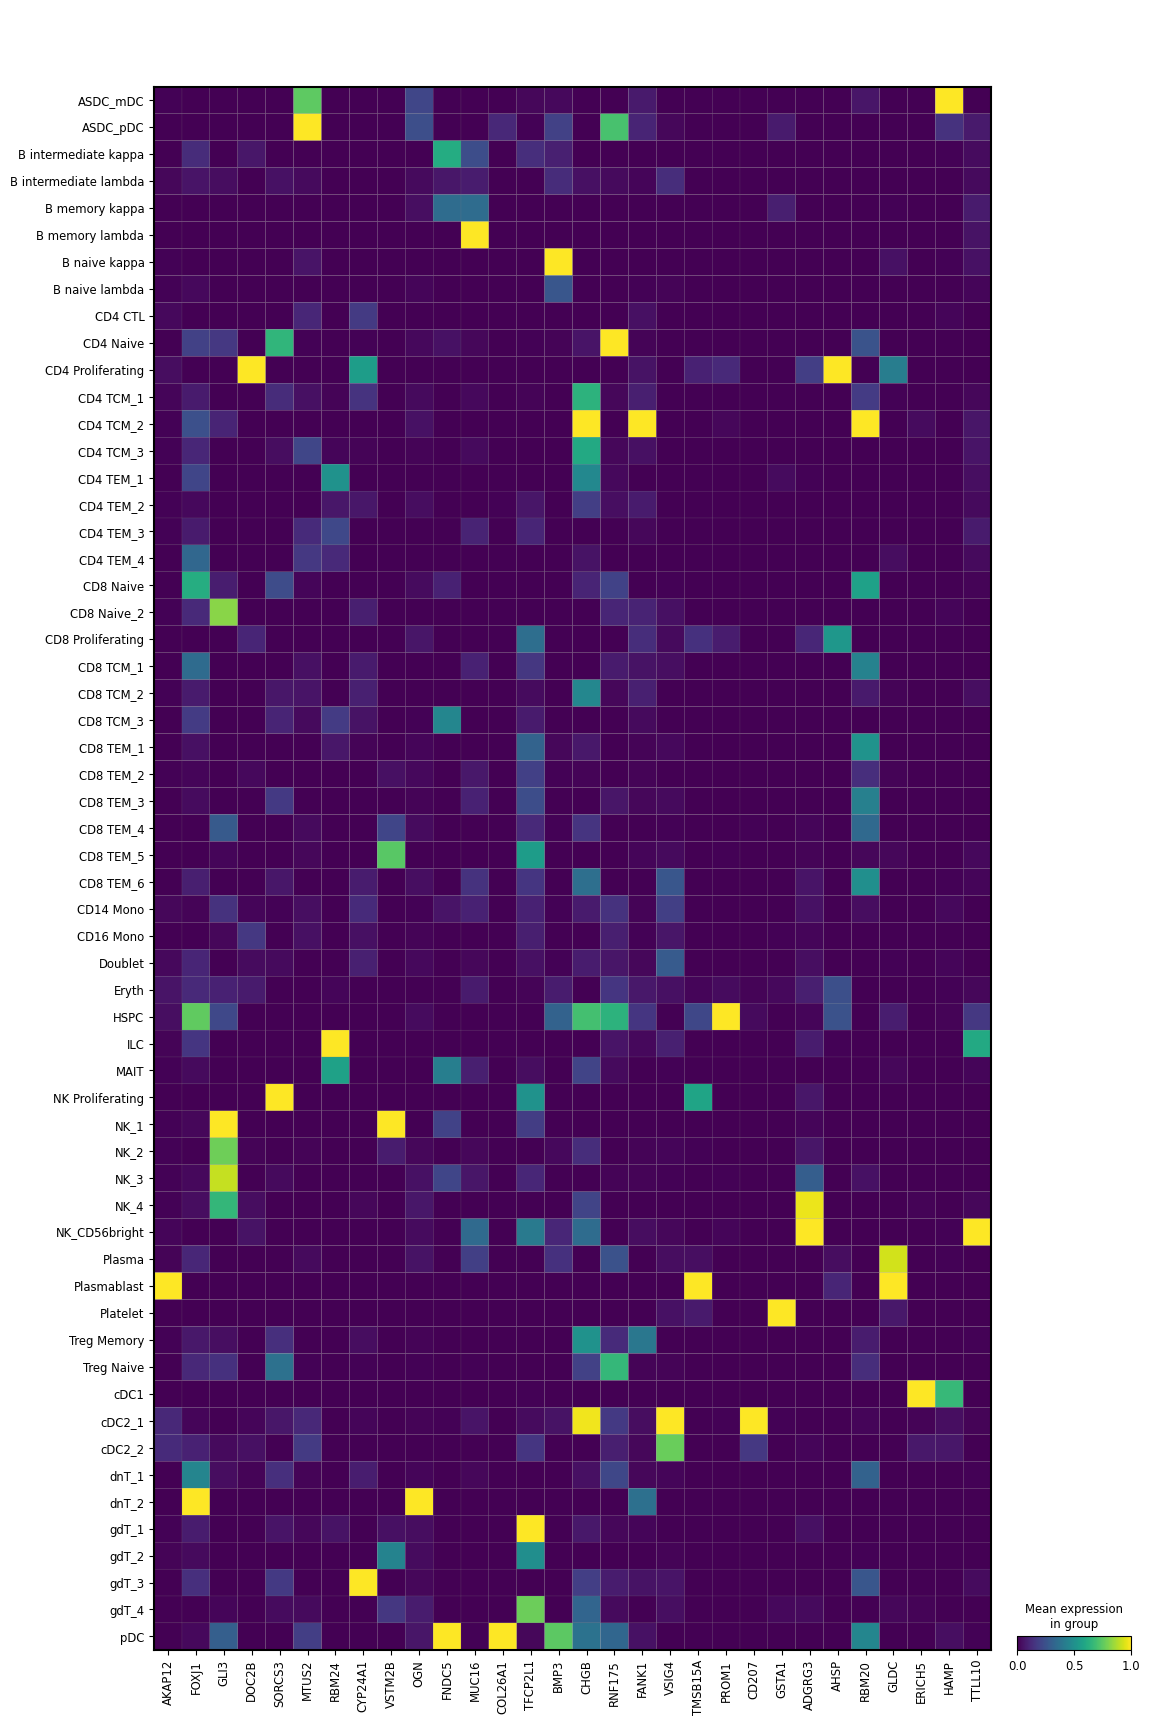

In [61]:
markers = check_markers_in_adata(adata2, list(scherlock.get_results(column_ctype="celltype.l3")['top_markers'].values()))
sc.pl.matrixplot(adata2, groupby='cell_type', var_names=markers, use_raw=False, standard_scale='var', cmap='viridis', swap_axes=False)

Found 46 out of 100 markers
Missing: 54 markers
CD16 Mono
Found 46 out of 100 markers
Missing: 54 markers


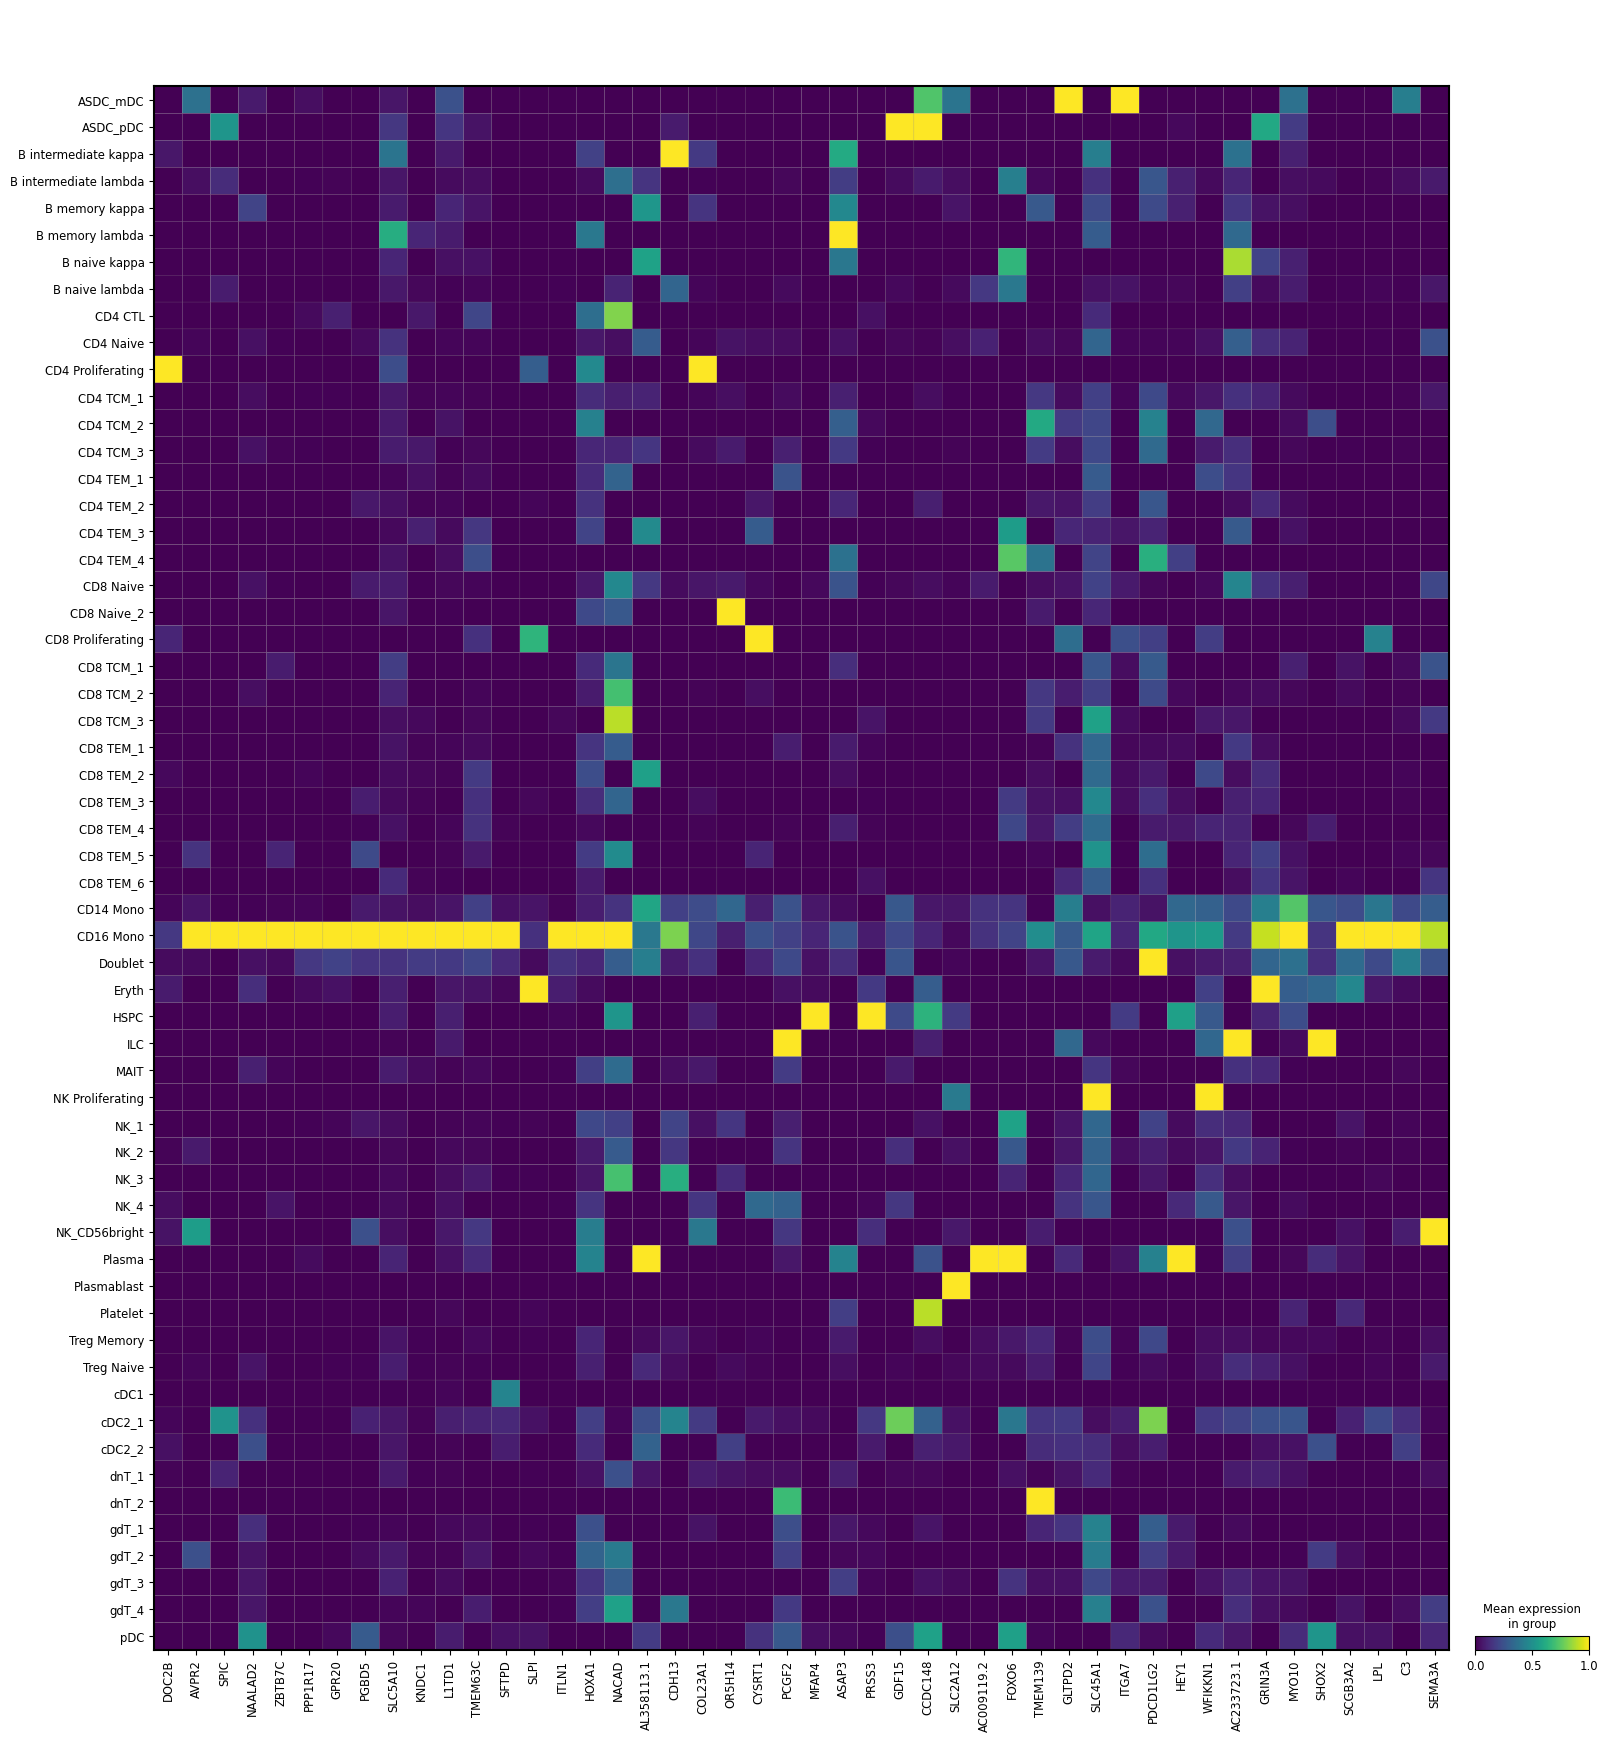

Found 75 out of 100 markers
Missing: 25 markers
pDC
Found 75 out of 100 markers
Missing: 25 markers


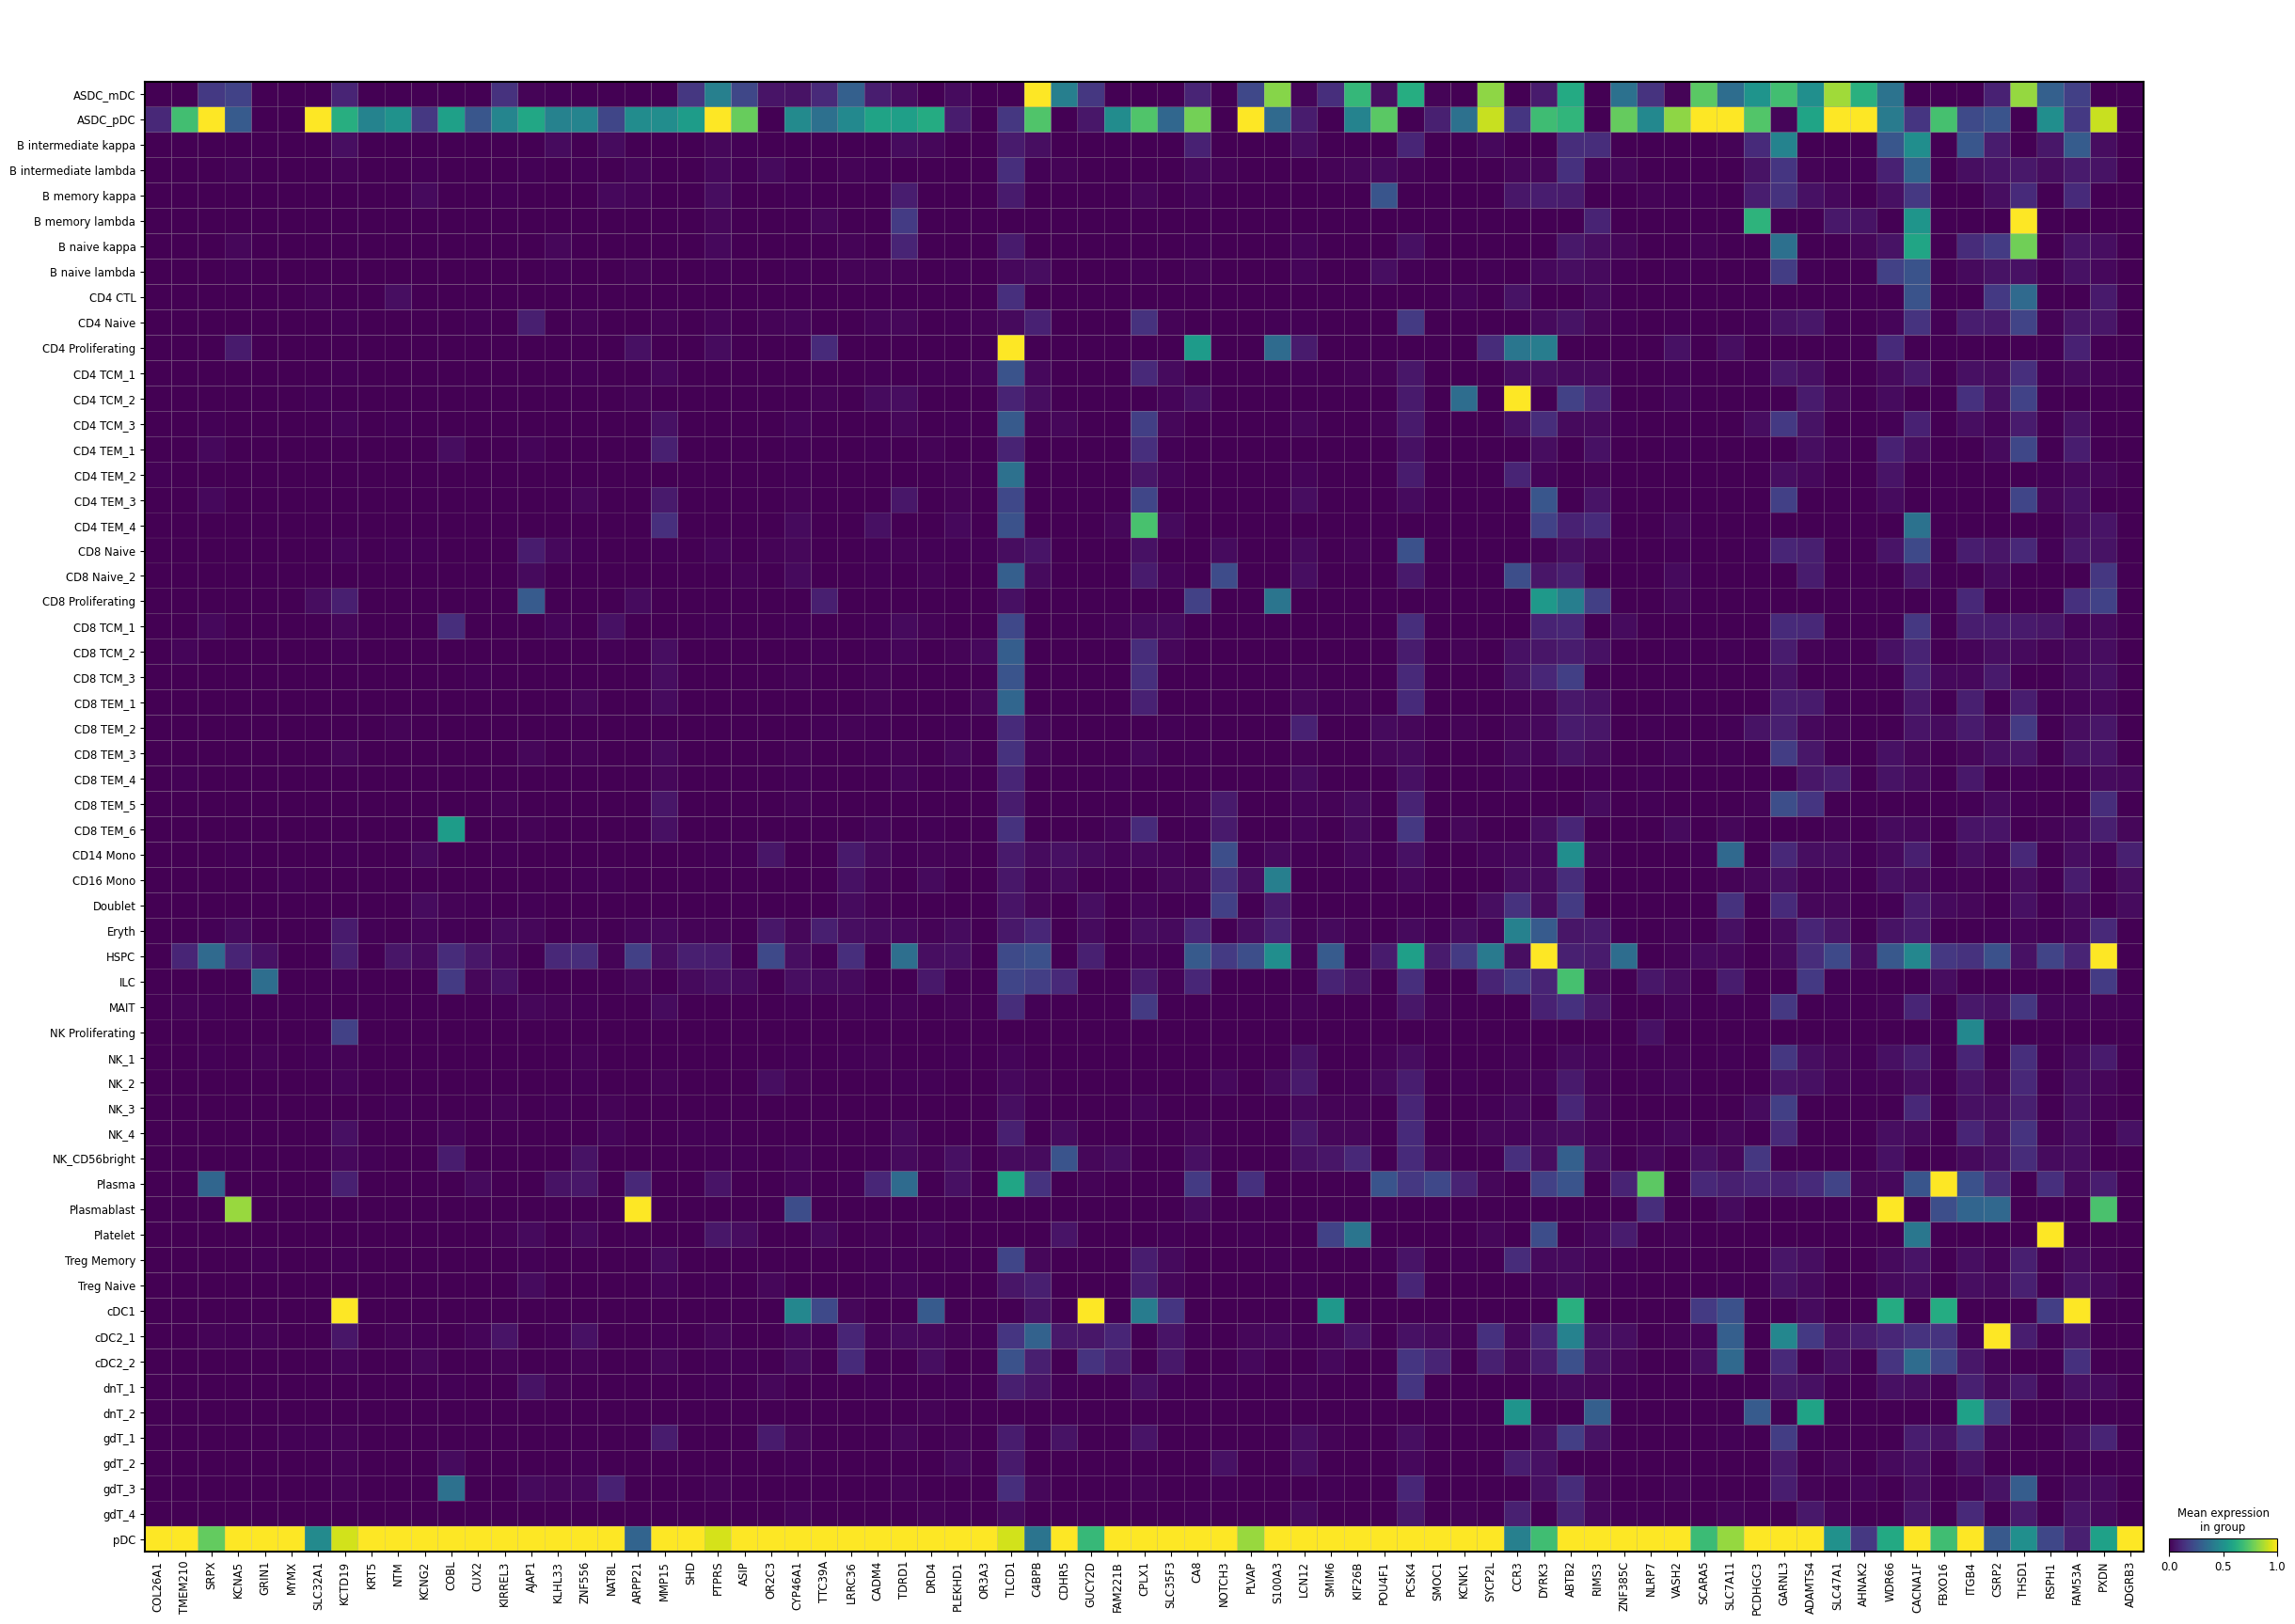

Found 45 out of 100 markers
Missing: 55 markers
CD14 Mono
Found 45 out of 100 markers
Missing: 55 markers


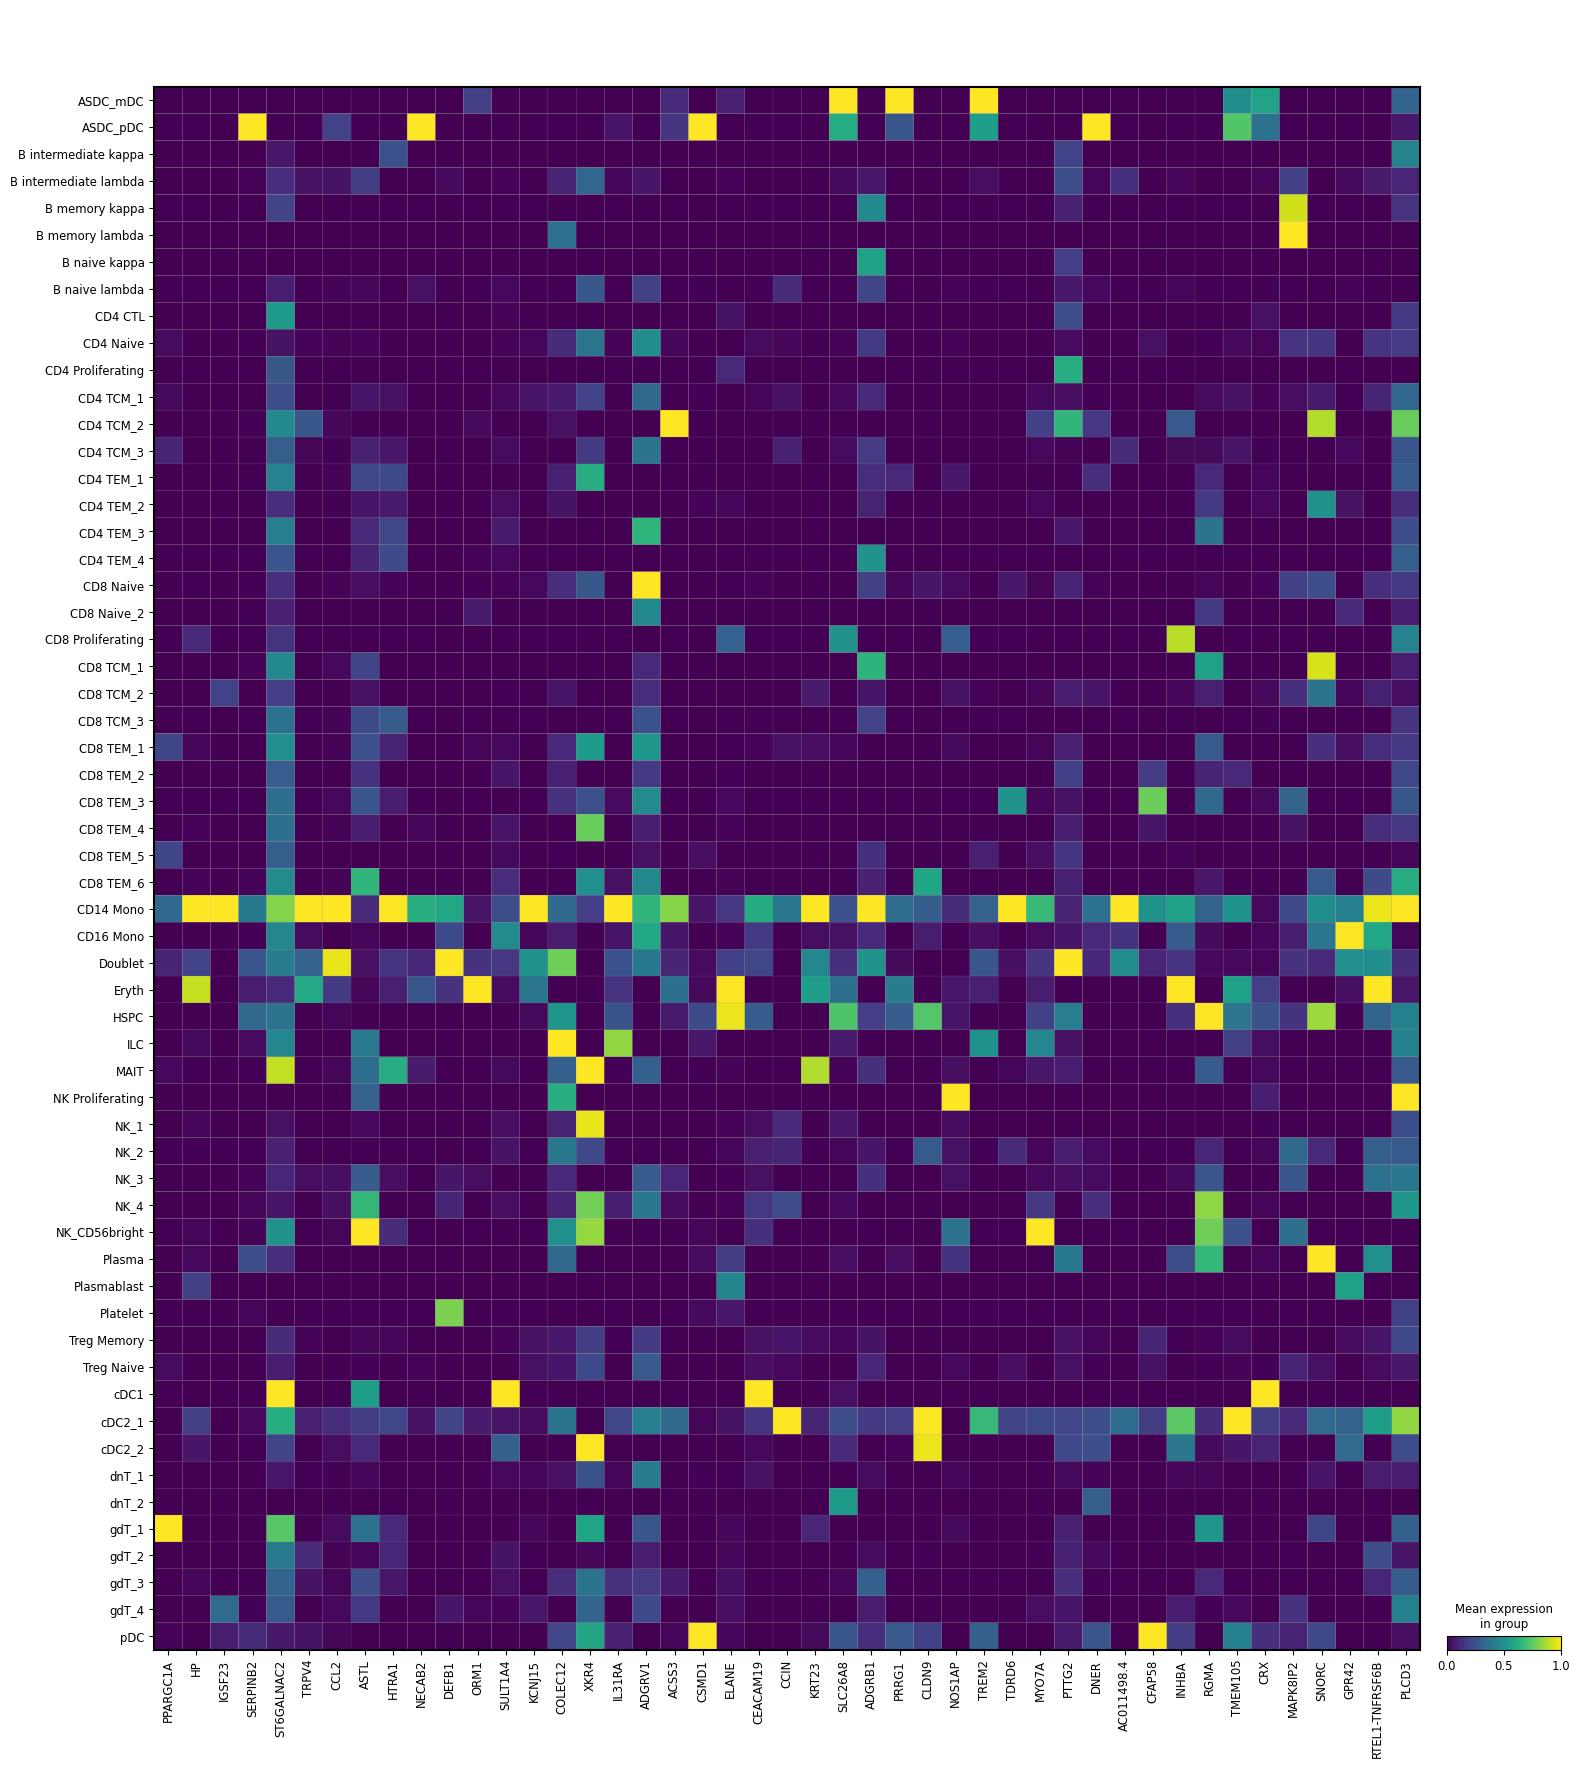

Found 0 out of 0 markers
Missing: 0 markers
Found 17 out of 20 markers
Missing: 3 markers
cDC2_1
Found 17 out of 20 markers
Missing: 3 markers


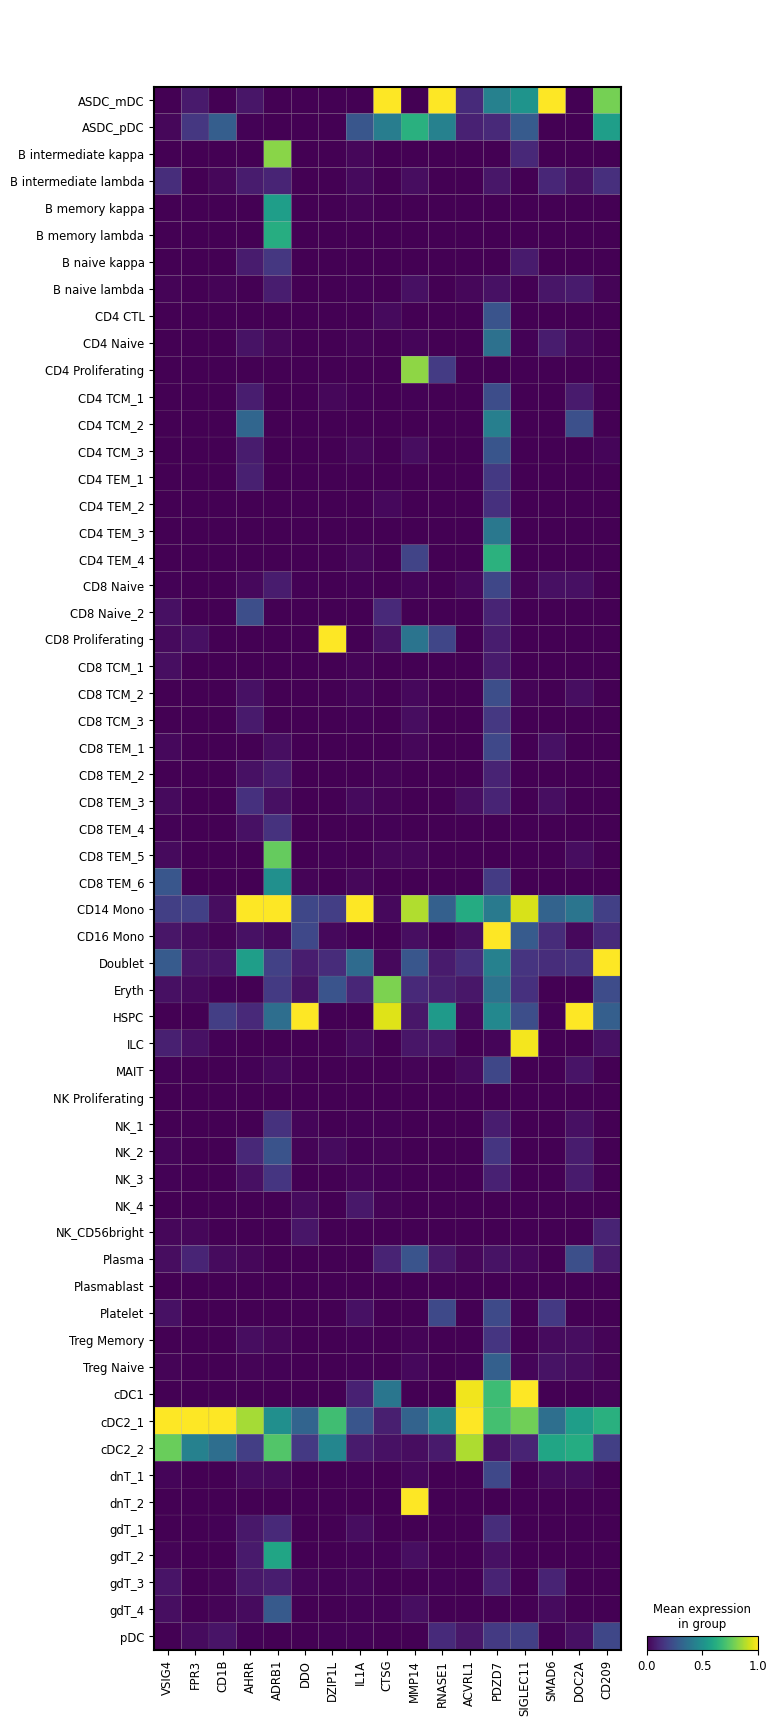

Found 1 out of 3 markers
Missing: 2 markers
Doublet
Found 1 out of 3 markers
Missing: 2 markers


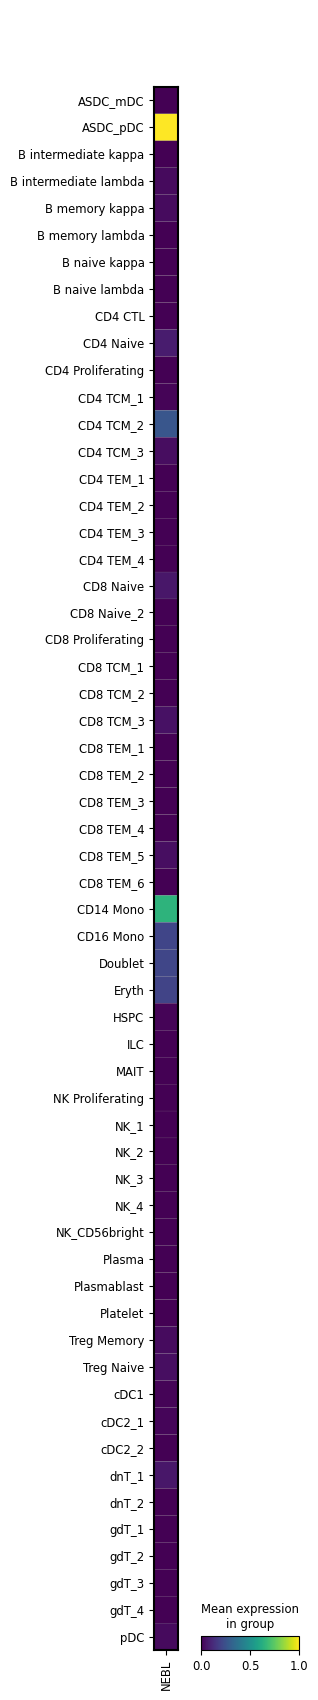

Found 4 out of 4 markers
Missing: 0 markers
Treg Memory
Found 4 out of 4 markers
Missing: 0 markers


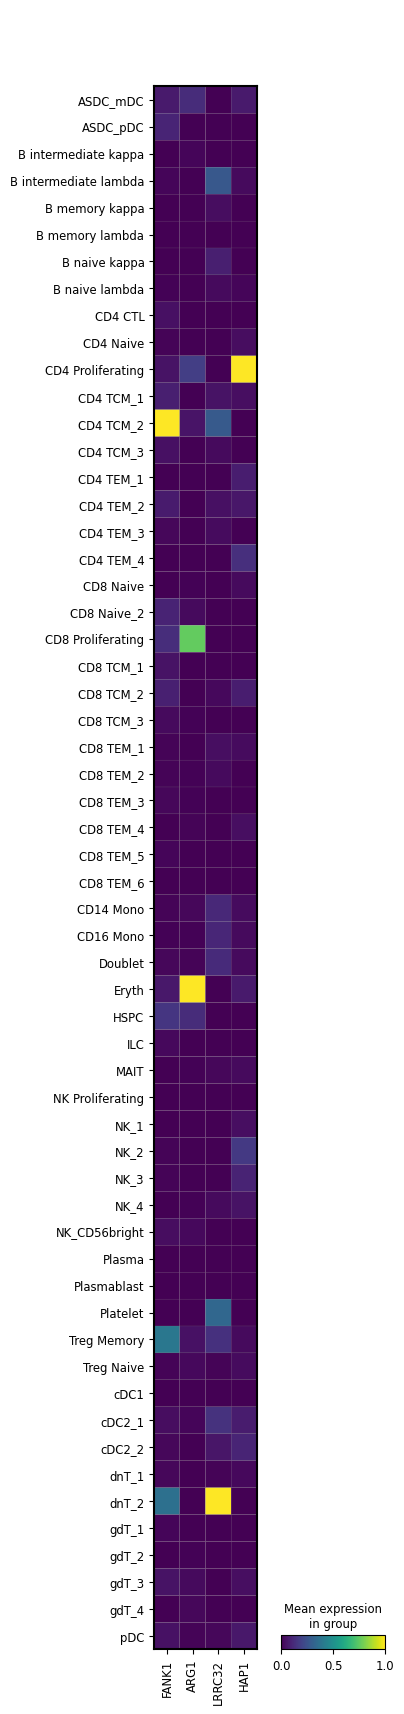

Found 0 out of 1 markers
Missing: 1 markers
Found 2 out of 2 markers
Missing: 0 markers
gdT_4
Found 2 out of 2 markers
Missing: 0 markers


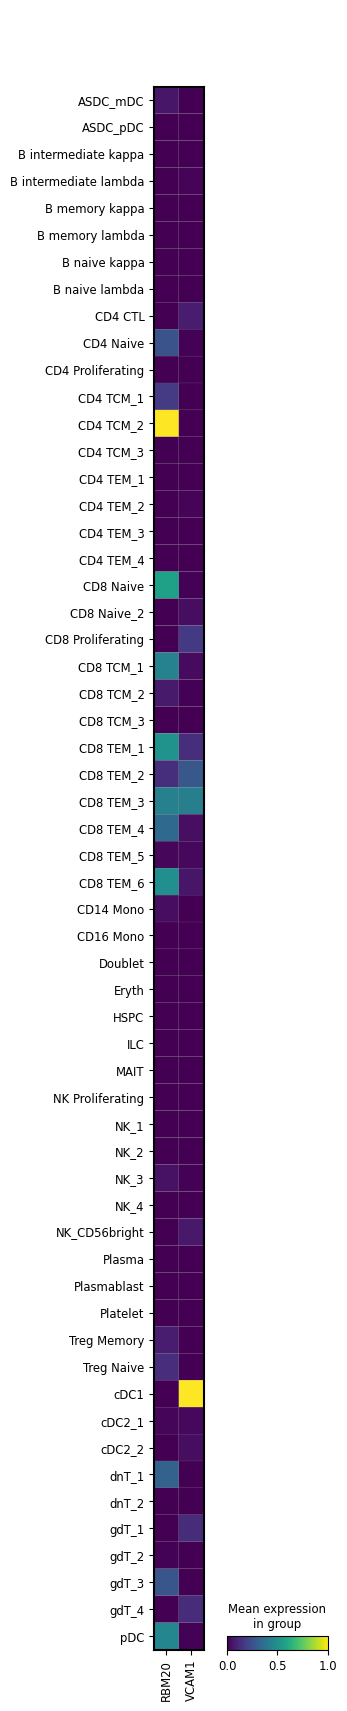

Found 4 out of 4 markers
Missing: 0 markers
CD8 TEM_4
Found 4 out of 4 markers
Missing: 0 markers


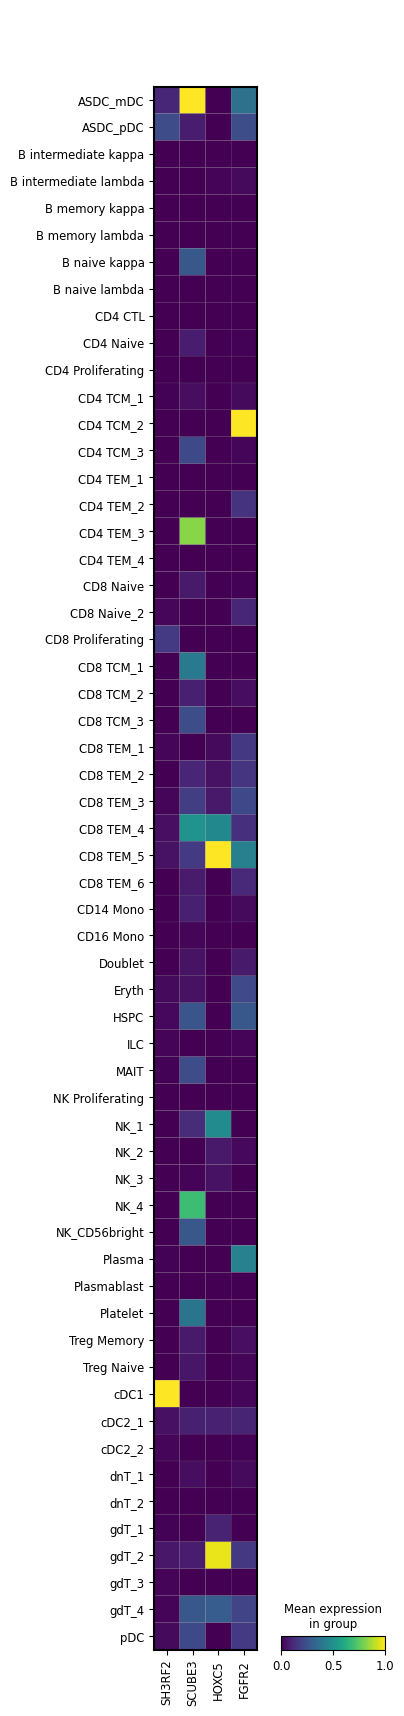

Found 5 out of 5 markers
Missing: 0 markers
NK_1
Found 5 out of 5 markers
Missing: 0 markers


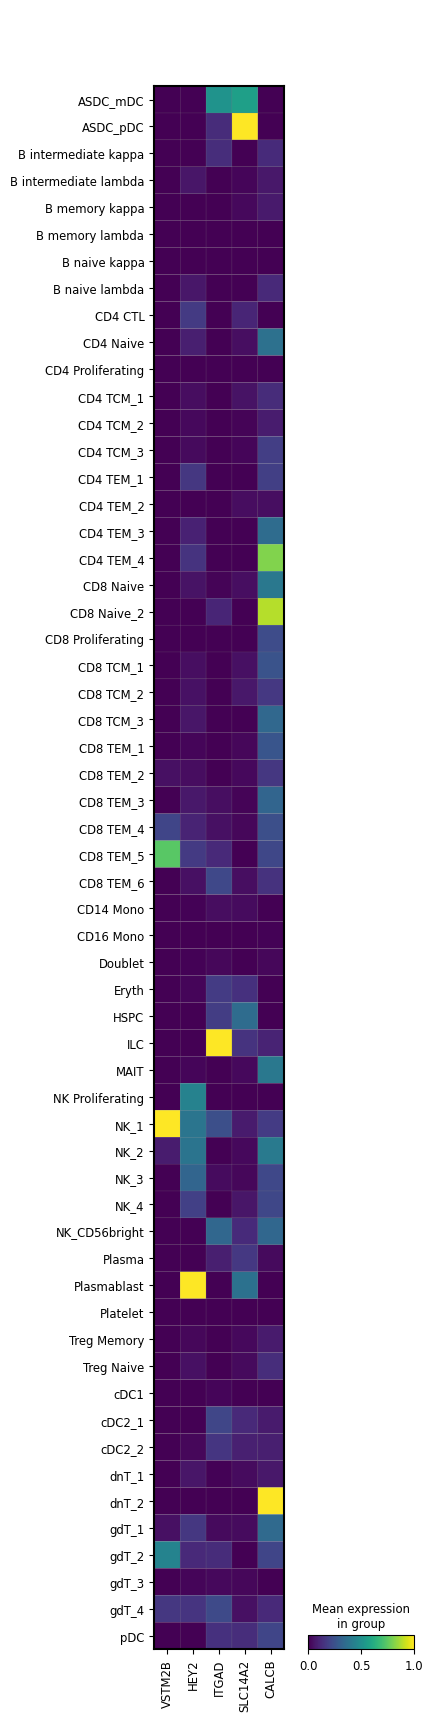

Found 0 out of 0 markers
Missing: 0 markers
Found 7 out of 11 markers
Missing: 4 markers
CD4 TCM_1
Found 7 out of 11 markers
Missing: 4 markers


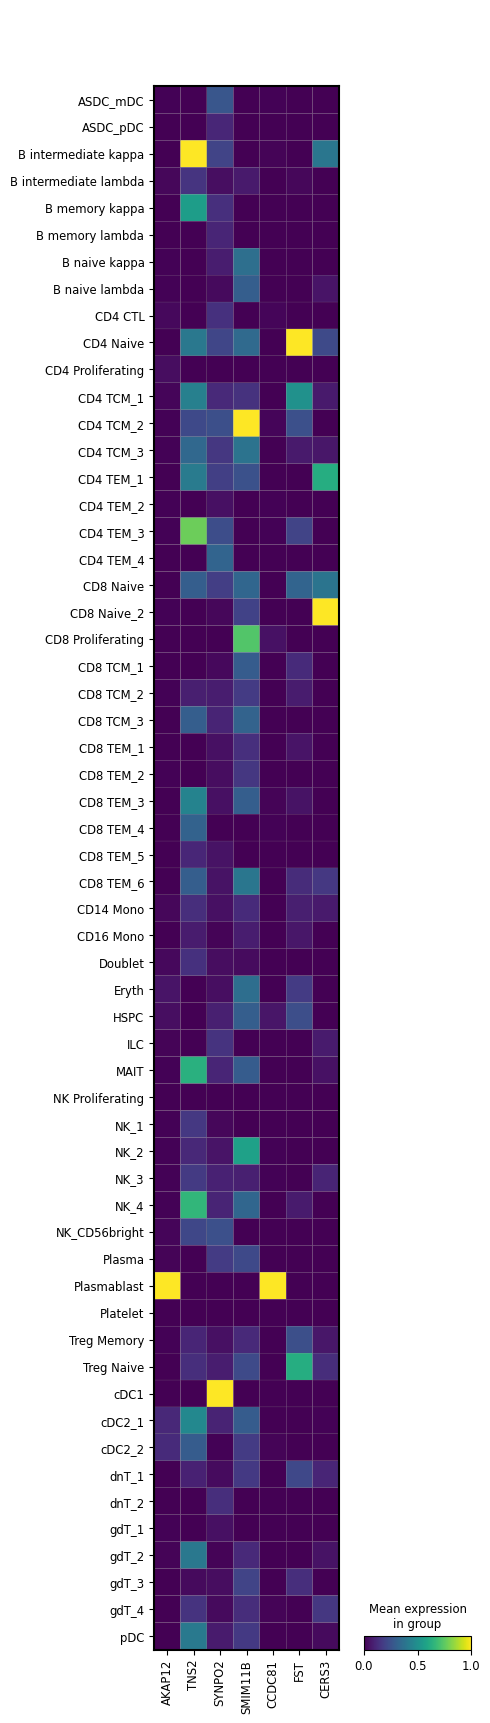

Found 30 out of 72 markers
Missing: 42 markers
CD4 Naive
Found 30 out of 72 markers
Missing: 42 markers


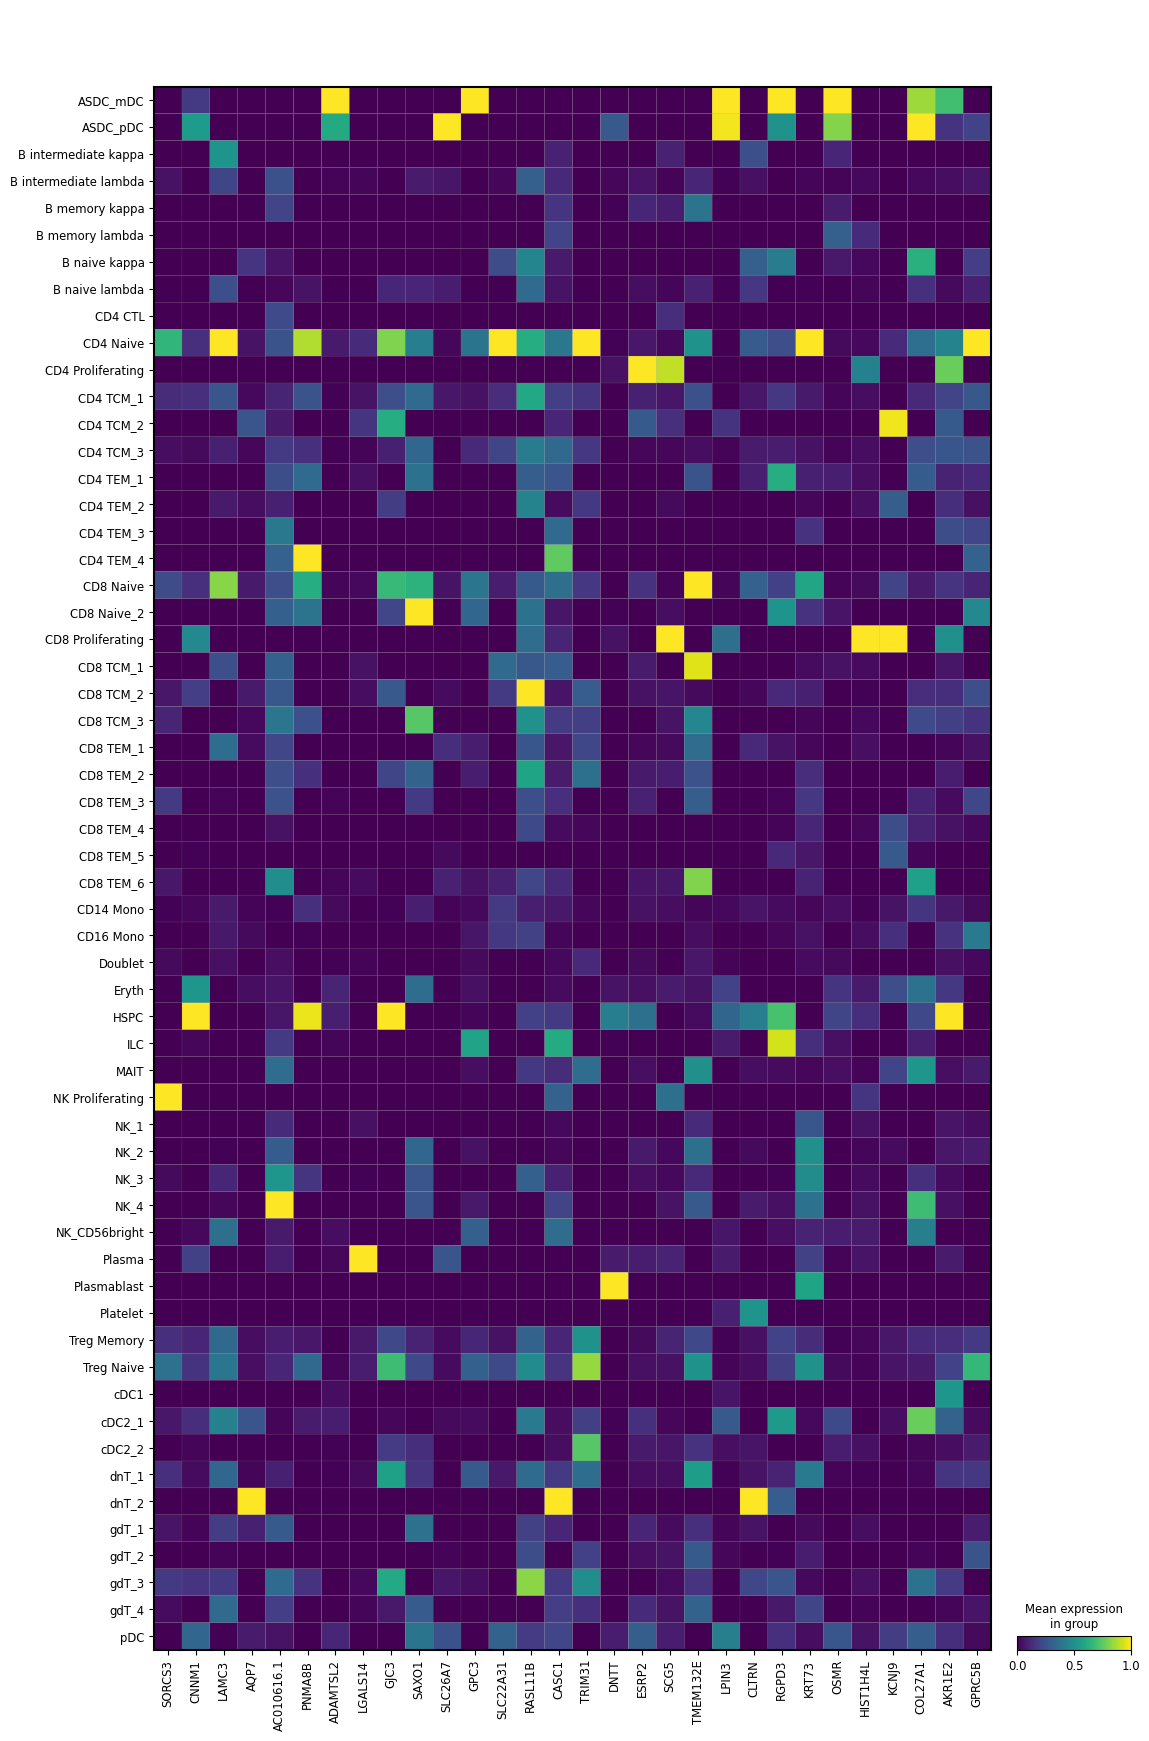

Found 0 out of 0 markers
Missing: 0 markers
Found 0 out of 0 markers
Missing: 0 markers
Found 22 out of 39 markers
Missing: 17 markers
NK_2
Found 22 out of 39 markers
Missing: 17 markers


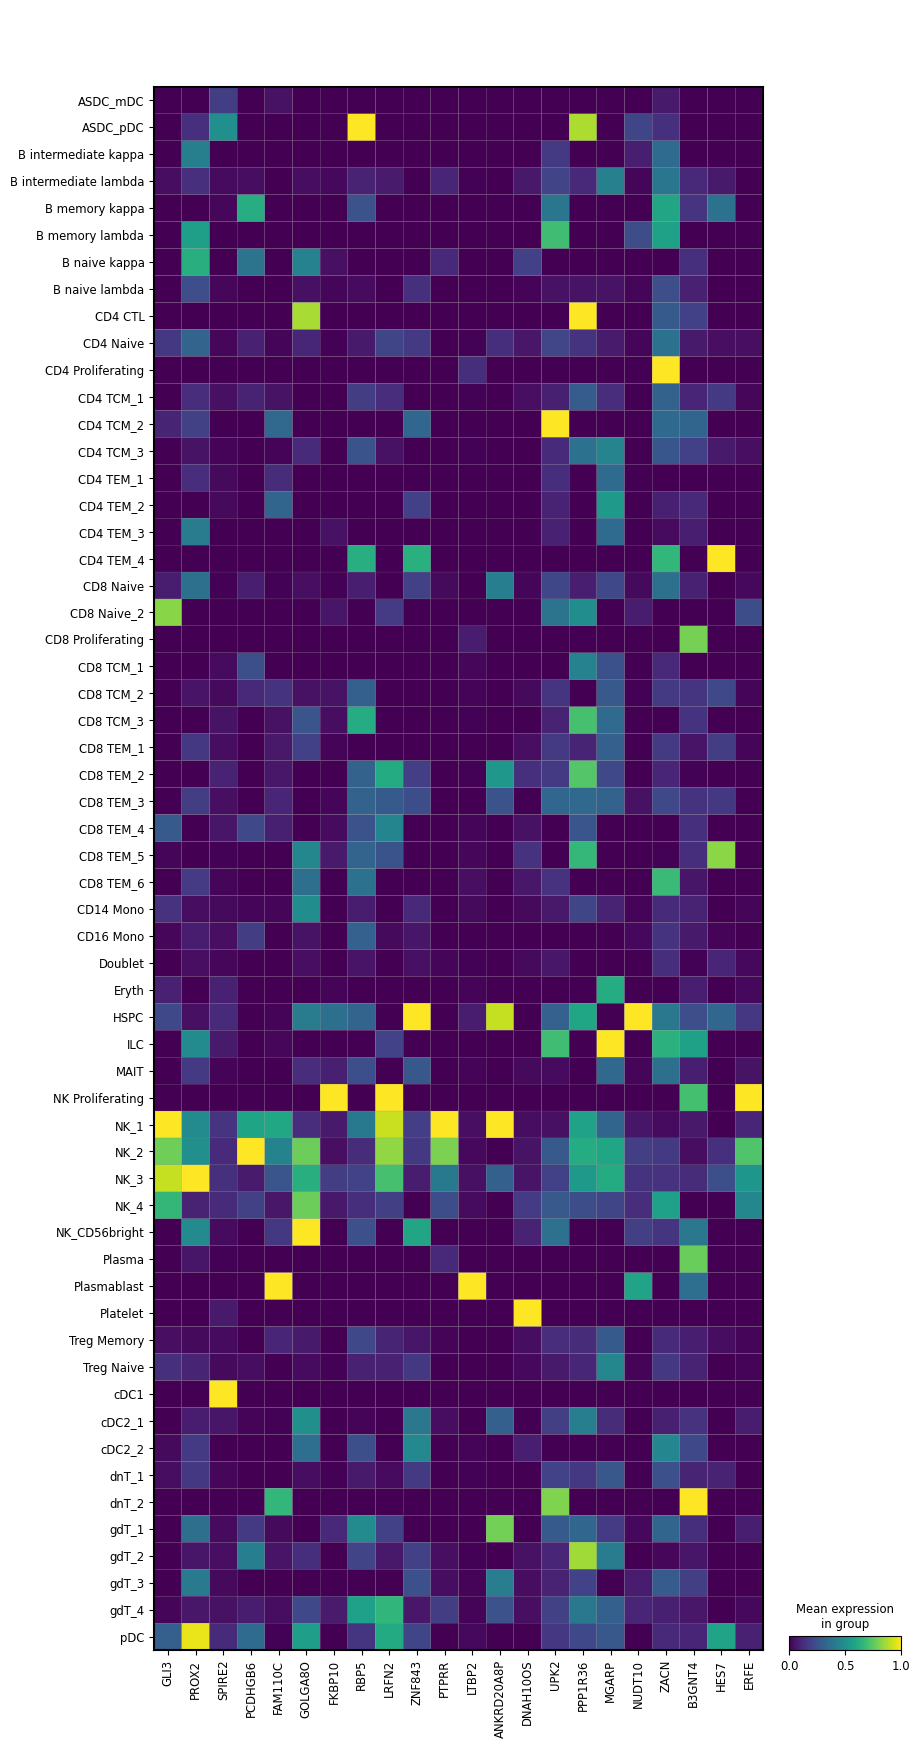

Found 20 out of 27 markers
Missing: 7 markers
NK Proliferating
Found 20 out of 27 markers
Missing: 7 markers


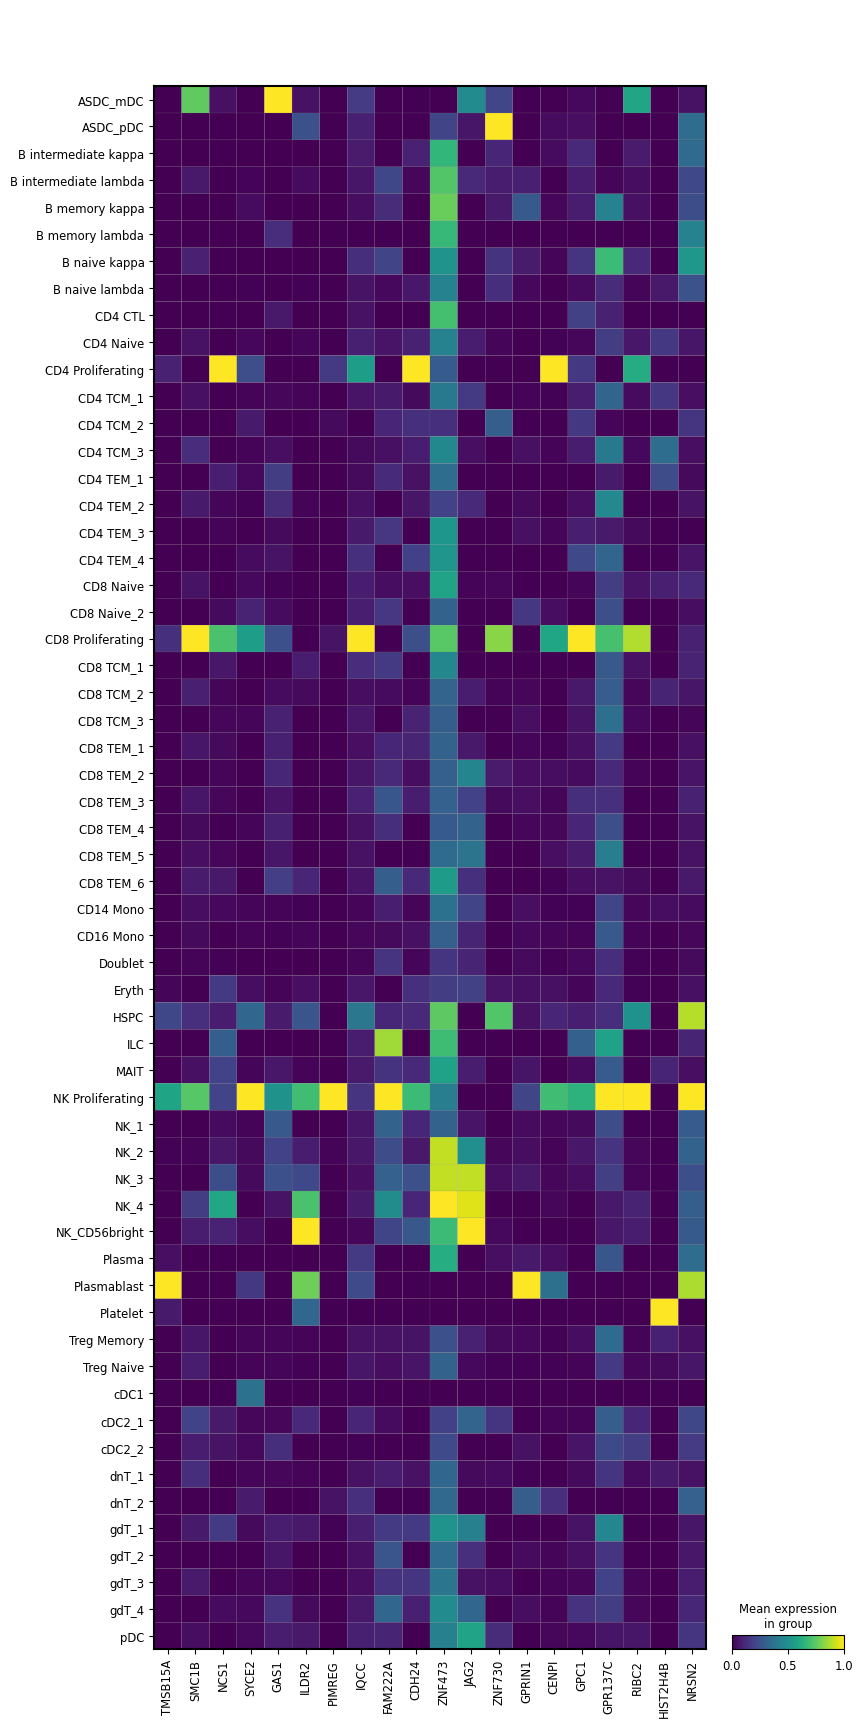

Found 1 out of 1 markers
Missing: 0 markers
Treg Naive
Found 1 out of 1 markers
Missing: 0 markers


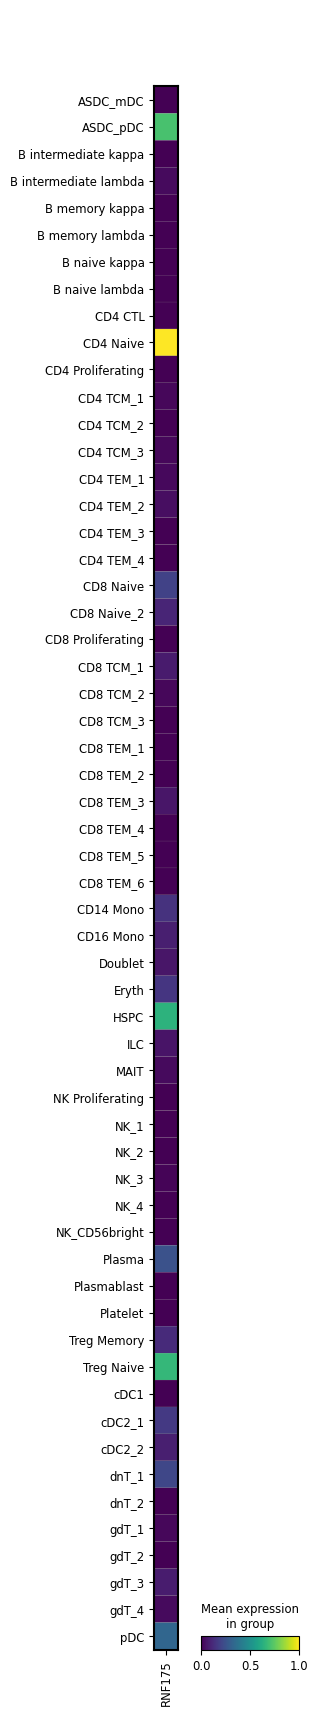

Found 0 out of 0 markers
Missing: 0 markers
Found 2 out of 2 markers
Missing: 0 markers
gdT_3
Found 2 out of 2 markers
Missing: 0 markers


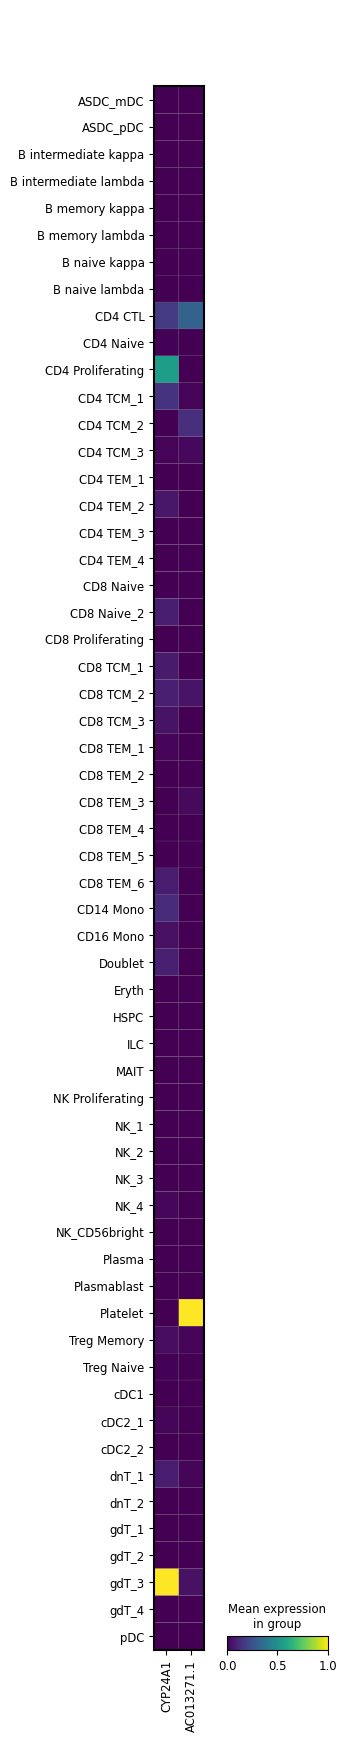

Found 0 out of 0 markers
Missing: 0 markers
Found 0 out of 0 markers
Missing: 0 markers
Found 14 out of 15 markers
Missing: 1 markers
Eryth
Found 14 out of 15 markers
Missing: 1 markers


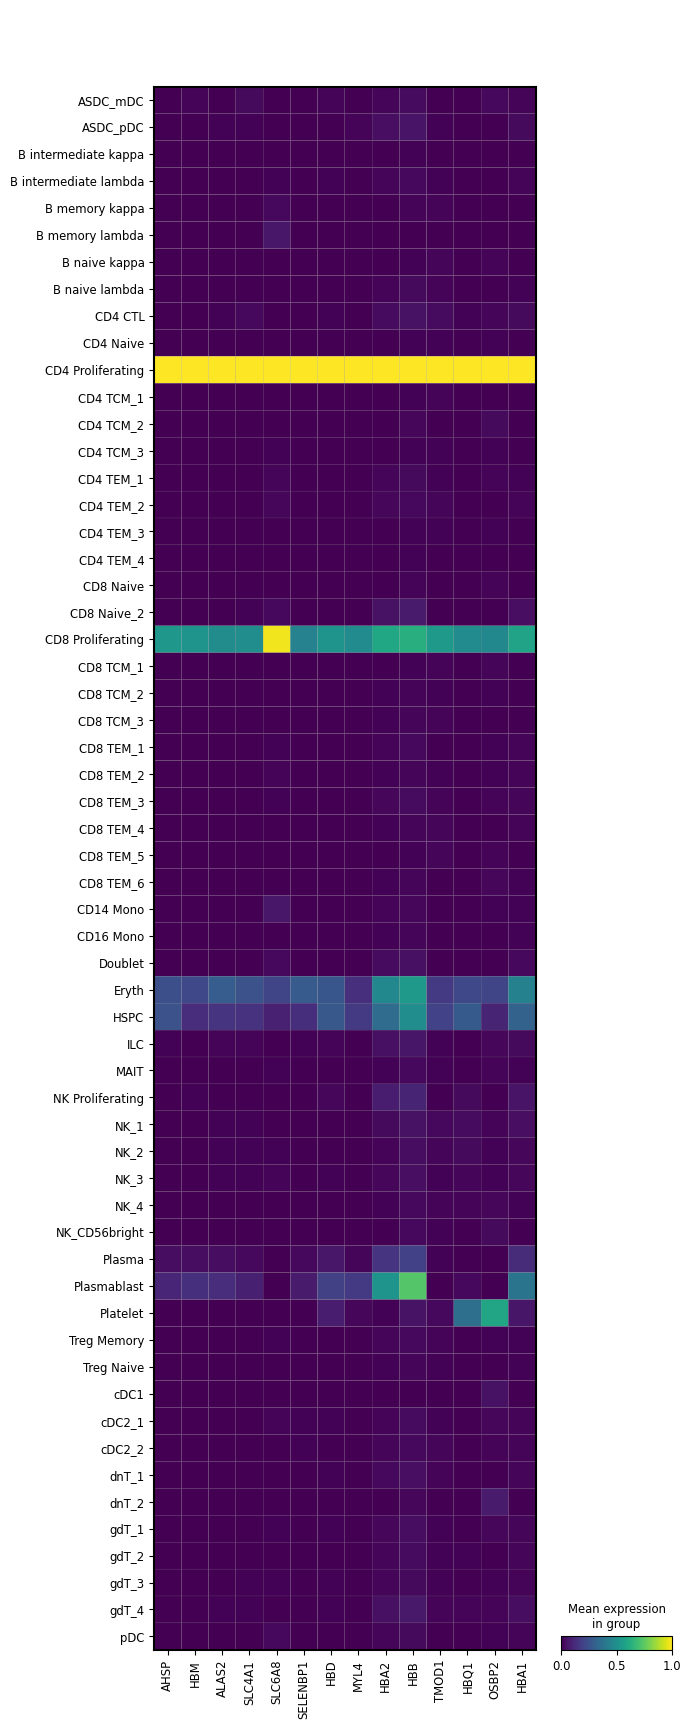

Found 0 out of 0 markers
Missing: 0 markers
Found 5 out of 5 markers
Missing: 0 markers
CD8 TCM_2
Found 5 out of 5 markers
Missing: 0 markers


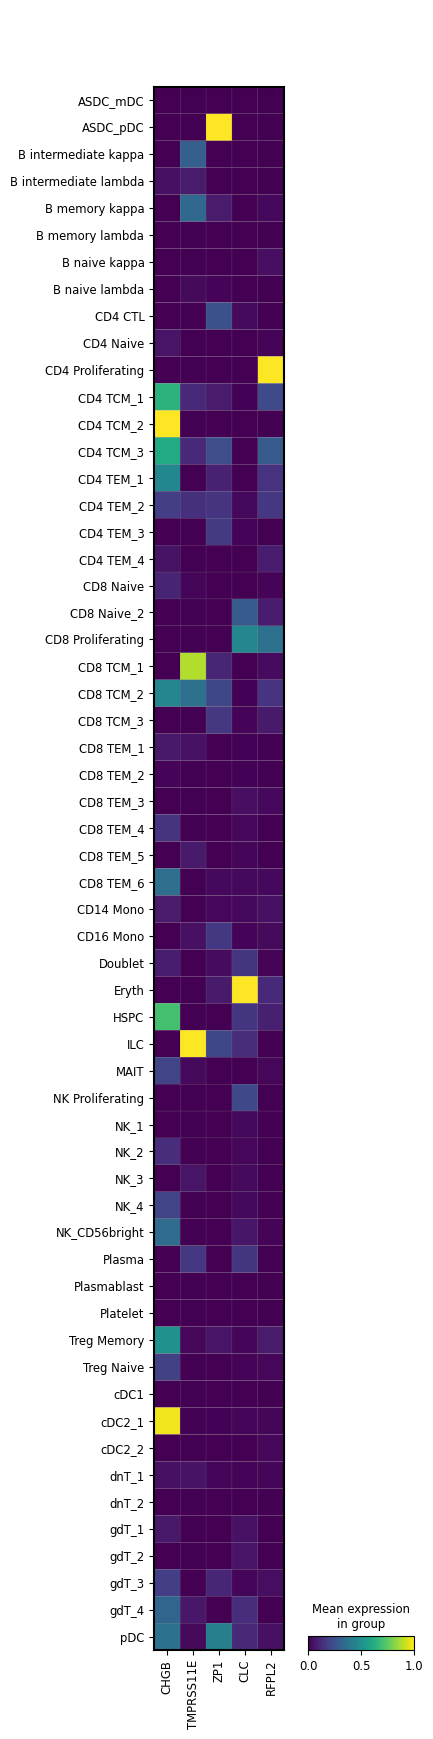

Found 7 out of 10 markers
Missing: 3 markers
NK_CD56bright
Found 7 out of 10 markers
Missing: 3 markers


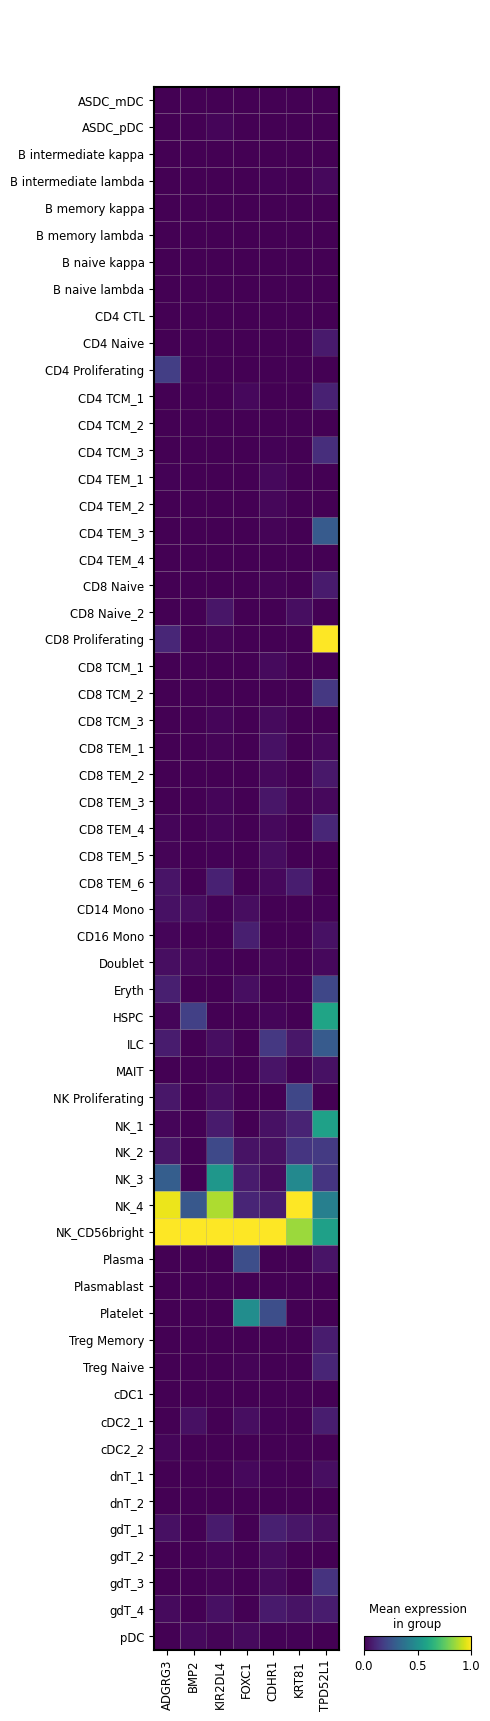

Found 3 out of 4 markers
Missing: 1 markers
B intermediate lambda
Found 3 out of 4 markers
Missing: 1 markers


KeyboardInterrupt: 

In [48]:
for ctype in adata2.obs['cell_type'].unique():
    if len(check_markers_in_adata(adata2, gene_lists[ctype]))>0:
        print(ctype)
        sc.pl.matrixplot(adata2, groupby='cell_type', var_names=check_markers_in_adata(adata2, gene_lists[ctype]), use_raw=False, standard_scale='var', cmap='viridis', swap_axes=False)

Found 46 out of 100 markers
Missing: 54 markers
Found 75 out of 100 markers
Missing: 25 markers
Found 45 out of 100 markers
Missing: 55 markers
Found 0 out of 0 markers
Missing: 0 markers
Found 17 out of 20 markers
Missing: 3 markers
Found 1 out of 3 markers
Missing: 2 markers
Found 4 out of 4 markers
Missing: 0 markers
Found 0 out of 1 markers
Missing: 1 markers
Found 2 out of 2 markers
Missing: 0 markers
Found 4 out of 4 markers
Missing: 0 markers
Found 5 out of 5 markers
Missing: 0 markers
Found 0 out of 0 markers
Missing: 0 markers
Found 7 out of 11 markers
Missing: 4 markers
Found 30 out of 72 markers
Missing: 42 markers
Found 0 out of 0 markers
Missing: 0 markers
Found 0 out of 0 markers
Missing: 0 markers
Found 22 out of 39 markers
Missing: 17 markers
Found 20 out of 27 markers
Missing: 7 markers
Found 1 out of 1 markers
Missing: 0 markers
Found 0 out of 0 markers
Missing: 0 markers
Found 2 out of 2 markers
Missing: 0 markers
Found 0 out of 0 markers
Missing: 0 markers
Found 0 o

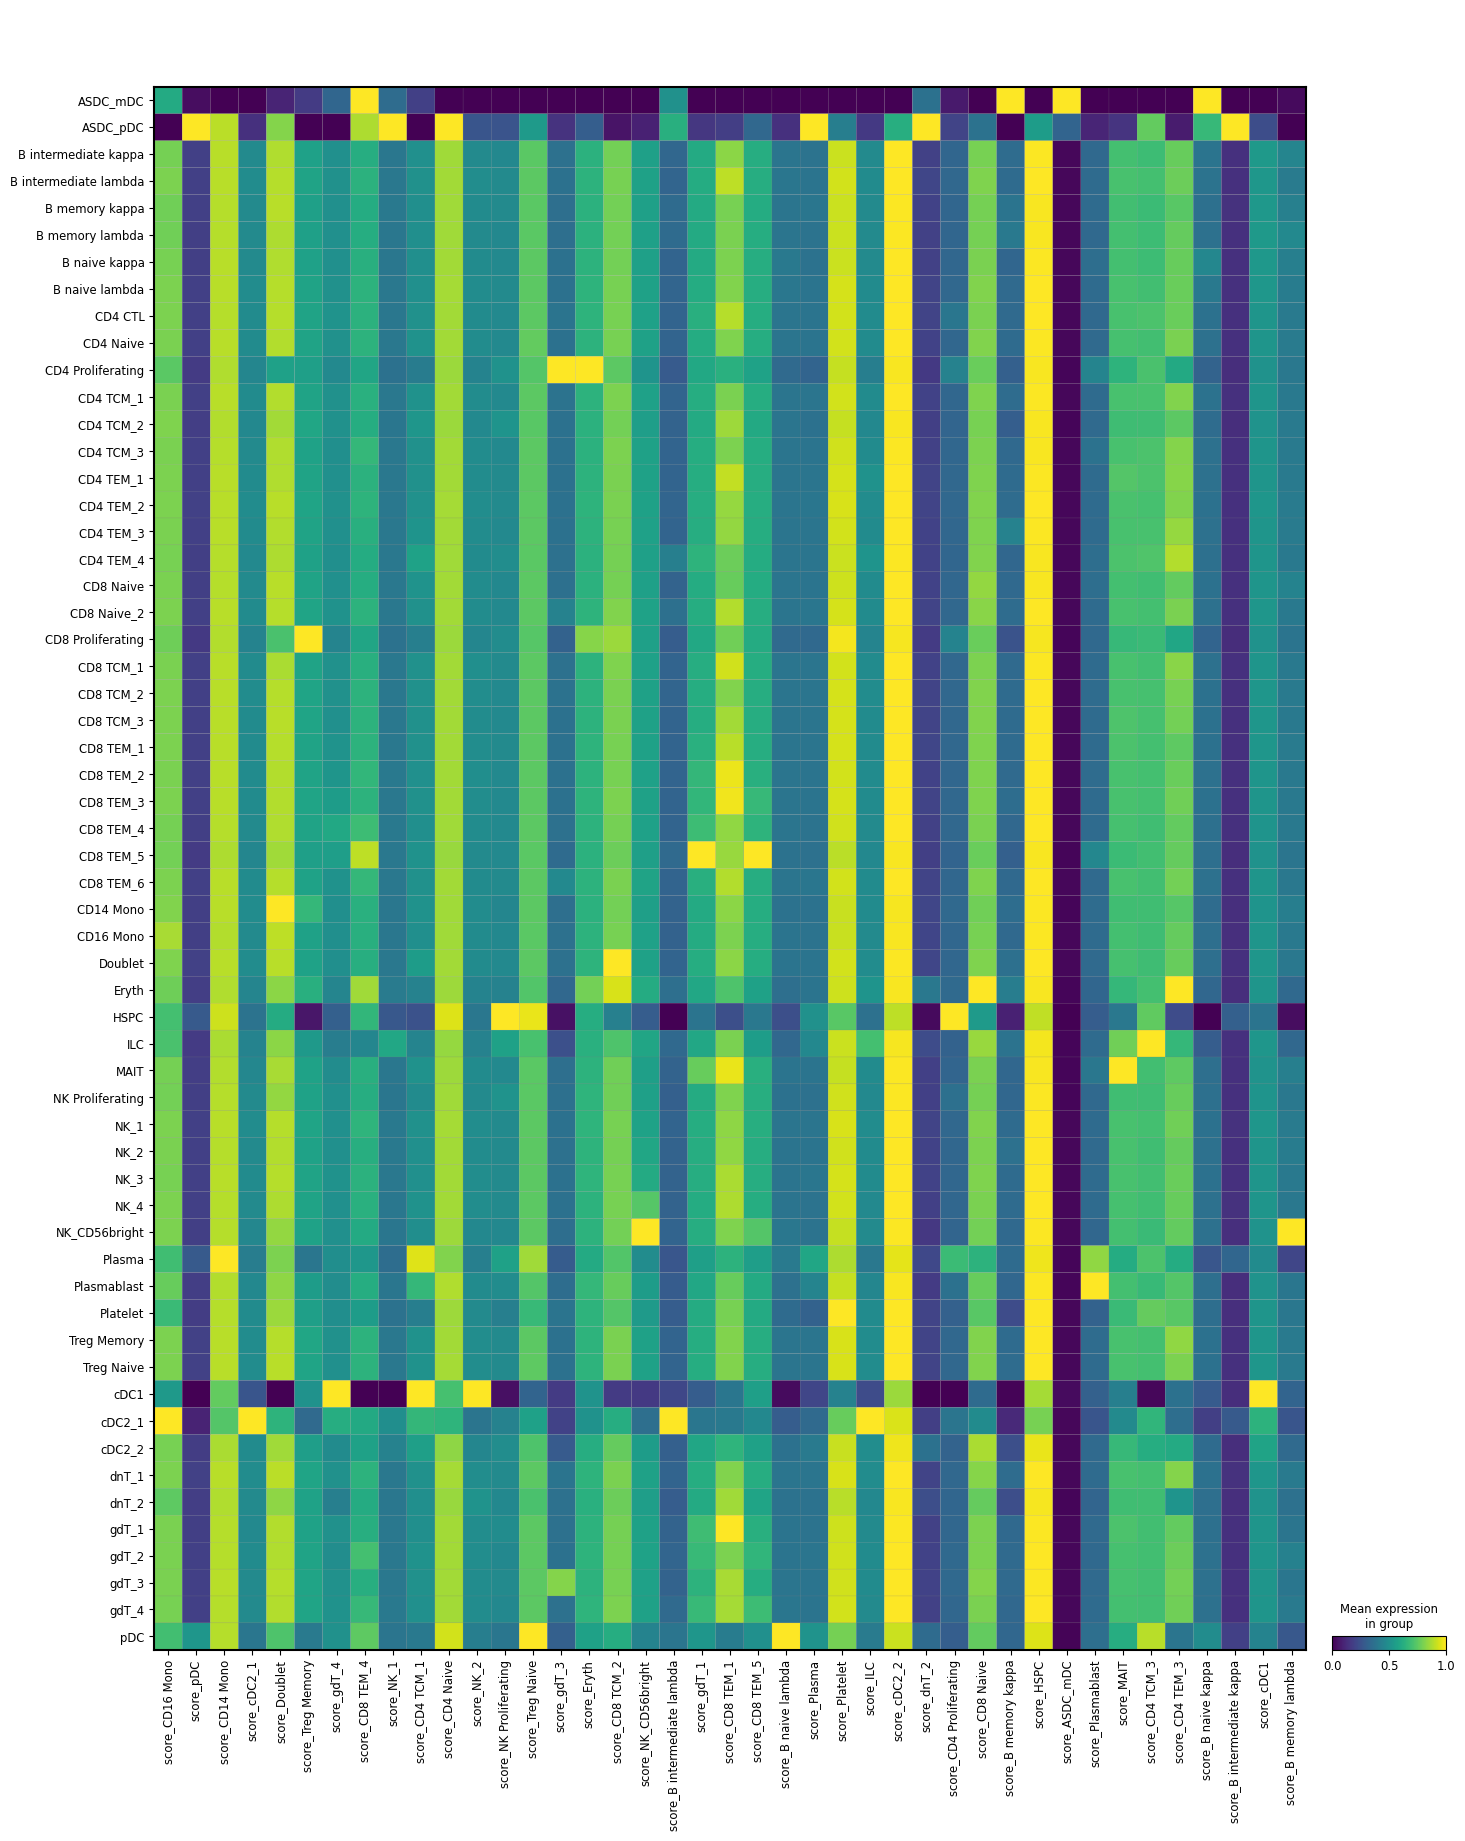

In [63]:
metacell_scores = []
for ctype in adata2.obs['cell_type'].unique():
    metacell = check_markers_in_adata(adata2, gene_lists[ctype])
    if len(metacell) < 1:
        continue
    sc.tl.score_genes(adata2, gene_list=metacell, score_name='score_'+ctype)
    metacell_scores.append('score_'+ctype)
sc.pl.matrixplot(adata2, groupby='cell_type', var_names=metacell_scores, use_raw=False, standard_scale='var', cmap='viridis', swap_axes=False)

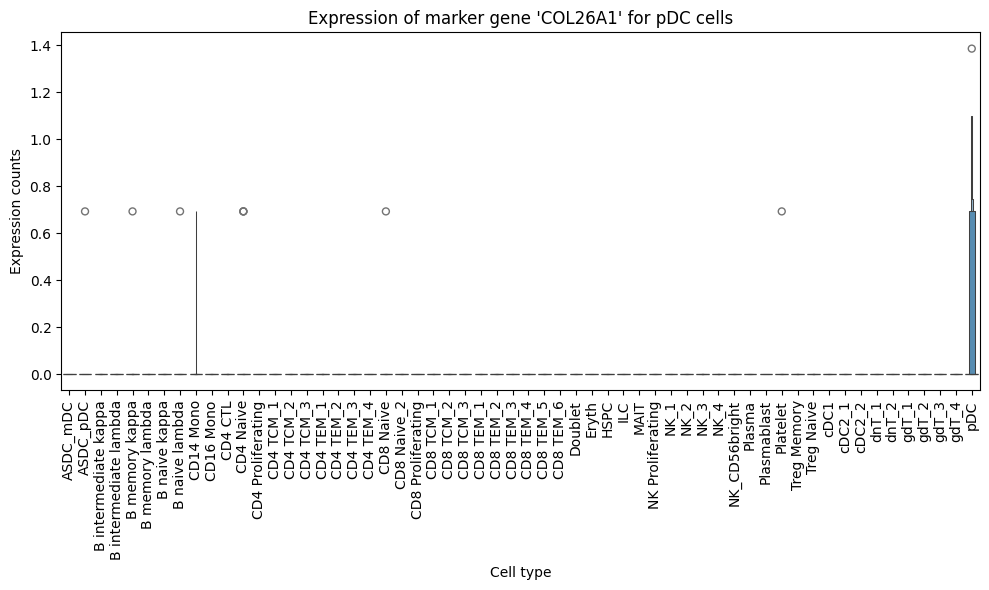

In [18]:
scherlock.visualize_marker(gene="COL26A1",column_ctype='celltype.l3')

In [19]:
fig = scherlock.plot_corr_theoric_empiric(min_genes=3)

TypeError: ScSherlock.plot_corr_theoric_empiric() missing 1 required positional argument: 'column_ctype'

## Exporting results 

In [8]:
ctype = 'CD14 Mono'
scherlock.get_scores('CD14 Mono', method='empiric')[ctype]

NameError: name 'scherlock' is not defined